# Çalışan Yıpranma Tahmini Projesi

## Problemin Tanımı ve Amaçlar

Kurumsal şirketlerin en önemli sıkıntılarından birisi de çalışanların şirket bağlılığının ve memnuniyetinin ölçülebilmesidir. Bu bilgiyi kullanarak şirketler çalışanlarına daha iyi bir çalışma ortamı sunabilmek ve çalışan mutluluğunu arttırabilmek için ne tür aksiyonlar almaları gerektiğine karar verebilir.

Aynı zamanda, kişi bazında yapılan analizlerde hangi çalışanların işten ayrılma ihtimalinin olduğu tespit edilebilirse şirket bu çalışanı elinde tutmak için bu kişiye promosyon teklif edebilir, veya bu kişinin yaşadığı sıkıntıları ortadan kaldırabilir.

Bu projedeki amaç, çalışan bilgilerini kullanarak hangi çalışanların yıpranma payının daha fazla olduğunu, dolayısıyla da işten ayrılmaya daha yatkın olabileceğini tespit etmektir. Bunu yaparken çalışan yıpranmasında hangi sebeplerin daha önemli olduğu bilgisini de bulmanız beklenmektedir.

#### Veri

Bu proje için kullanılacak veride toplamda 35 kolon bulunmaktadır.

| Name                       | Description                                                                                                                                                    |
|----------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| AGE                        | Numerical Value                                                                                                                                                |
| ATTRITION                  | Employee leaving the company (0=no, 1=yes)                                                                                                                     |
| BUSINESS TRAVEL            | (1=No Travel, 2=Travel Frequently, 3=Tavel Rarely)                                                                                                             |
| DAILY RATE                 | Numerical Value - Salary Level                                                                                                                                 |
| DEPARTMENT                 | (1=HR, 2=R&D, 3=Sales)                                                                                                                                         |
| DISTANCE FROM HOME         | Numerical Value - THE DISTANCE FROM WORK TO HOME                                                                                                               |
| EDUCATION                  | Numerical Value                                                                                                                                                |
| EDUCATION FIELD            | (1=HR, 2=LIFE SCIENCES, 3=MARKETING, 4=MEDICAL SCIENCES, 5=OTHERS, 6= TEHCNICAL)                                                                               |
| EMPLOYEE COUNT             | Numerical Value                                                                                                                                                |
| EMPLOYEE NUMBER            | Numerical Value - EMPLOYEE ID                                                                                                                                  |
| ENVIROMENT SATISFACTION    | Numerical Value - SATISFACTION WITH THE ENVIROMENT                                                                                                             |
| GENDER                     | (1=FEMALE, 2=MALE)                                                                                                                                             |
| HOURLY RATE                | Numerical Value - HOURLY SALARY                                                                                                                                |
| JOB INVOLVEMENT            | Numerical Value - JOB INVOLVEMENT                                                                                                                              |
| JOB LEVEL                  | Numerical Value - LEVEL OF JOB                                                                                                                                 |
| JOB ROLE                   | (1=HC REP, 2=HR, 3=LAB TECHNICIAN, 4=MANAGER, 5= MANAGING DIRECTOR, 6= REASEARCH DIRECTOR, 7= RESEARCH SCIENTIST, 8=SALES EXECUTIEVE, 9= SALES REPRESENTATIVE) |
| JOB SATISFACTION           | Numerical Value - SATISFACTION WITH THE JOB                                                                                                                    |
| MARITAL STATUS             | (1=DIVORCED, 2=MARRIED, 3=SINGLE)                                                                                                                              |
| MONTHLY INCOME             | Numerical Value - MONTHLY SALARY                                                                                                                               |
| MONTHY RATE                | Numerical Value - MONTHY RATE                                                                                                                                  |
| NUMCOMPANIES WORKED        | Numerical Value - NO. OF COMPANIES WORKED AT                                                                                                                   |
| OVER 18                    | (1=YES, 2=NO)                                                                                                                                                  |
| OVERTIME                   | (1=NO, 2=YES)                                                                                                                                                  |
| PERCENT SALARY HIKE        | Numerical Value - PERCENTAGE INCREASE IN SALARY                                                                                                                |
| PERFORMANCE RATING         | Numerical Value - ERFORMANCE RATING                                                                                                                            |
| RELATIONS SATISFACTION     | Numerical Value - RELATIONS SATISFACTION                                                                                                                       |
| STANDARD HOURS             | Numerical Value - STANDARD HOURS                                                                                                                               |
| STOCK OPTIONS LEVEL        | Numerical Value - STOCK OPTIONS                                                                                                                                |
| TOTAL WORKING YEARS        | Numerical Value - TOTAL YEARS WORKED                                                                                                                           |
| TRAINING TIMES LAST YEAR   | Numerical Value - HOURS SPENT TRAINING                                                                                                                         |
| WORK LIFE BALANCE          | Numerical Value - TIME SPENT BEWTWEEN WORK AND OUTSIDE                                                                                                         |
| YEARS AT COMPANY           | Numerical Value - TOTAL NUMBER OF YEARS AT THE COMPNAY                                                                                                         |
| YEARS IN CURRENT ROLE      | Numerical Value -YEARS IN CURRENT ROLE                                                                                                                         |
| YEARS SINCE LAST PROMOTION | Numerical Value - LAST PROMOTION                                                                                                                               |
| YEARS WITH CURRENT MANAGER | Numerical Value - YEARS SPENT WITH CURRENT MANAGER      

<hr style="height:0.5px;border-width:0;color:black;background-color:black">


## Kütüphaneler ve Ön Hazırlık

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

### Verinin yüklenmesi

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [3]:
train.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,30,Travel_Rarely,911,Research & Development,1,2,Medical,1,1989,4,...,80,0,12,6,2,12,8,1,7,No
1,48,Travel_Frequently,365,Research & Development,4,5,Medical,1,1644,3,...,80,1,23,3,3,2,2,2,2,No
2,27,Travel_Rarely,1469,Research & Development,1,2,Medical,1,497,4,...,80,1,5,2,3,5,2,0,4,No
3,34,Travel_Rarely,704,Sales,28,3,Marketing,1,2035,4,...,80,2,8,2,3,8,7,1,7,No
4,23,Travel_Frequently,638,Sales,9,3,Marketing,1,2023,4,...,80,1,1,3,2,1,0,1,0,Yes


In [4]:
test.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,21,Travel_Rarely,1343,Sales,22,1,Technical Degree,1,669,3,...,80,0,3,2,3,3,2,1,2,No
1,24,Travel_Rarely,693,Sales,3,2,Life Sciences,1,720,1,...,80,0,4,3,3,2,2,2,0,Yes
2,42,Travel_Rarely,933,Research & Development,29,3,Life Sciences,1,836,2,...,80,1,10,3,2,9,8,7,8,No
3,46,Travel_Rarely,168,Sales,4,2,Marketing,1,1280,4,...,80,1,26,2,3,11,4,0,8,No
4,35,Travel_Frequently,880,Sales,12,4,Other,1,1667,4,...,80,0,13,2,4,11,9,6,7,Yes


<hr style="height:0.5px;border-width:0;color:black;background-color:black">


## Veri Ön Analizi

##### Veride hangi kolonlar mevcut?

In [5]:
train.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [6]:
test

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,21,Travel_Rarely,1343,Sales,22,1,Technical Degree,1,669,3,...,80,0,3,2,3,3,2,1,2,No
1,24,Travel_Rarely,693,Sales,3,2,Life Sciences,1,720,1,...,80,0,4,3,3,2,2,2,0,Yes
2,42,Travel_Rarely,933,Research & Development,29,3,Life Sciences,1,836,2,...,80,1,10,3,2,9,8,7,8,No
3,46,Travel_Rarely,168,Sales,4,2,Marketing,1,1280,4,...,80,1,26,2,3,11,4,0,8,No
4,35,Travel_Frequently,880,Sales,12,4,Other,1,1667,4,...,80,0,13,2,4,11,9,6,7,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,22,Travel_Rarely,534,Research & Development,15,3,Medical,1,144,2,...,80,0,1,5,3,0,0,0,0,No
143,34,Travel_Rarely,546,Research & Development,10,3,Life Sciences,1,934,2,...,80,2,1,3,3,1,0,1,0,No
144,25,Travel_Frequently,599,Sales,24,1,Life Sciences,1,1273,3,...,80,0,1,4,3,1,0,1,0,Yes
145,38,Travel_Rarely,268,Research & Development,2,5,Medical,1,773,4,...,80,1,6,0,1,1,0,0,1,No


In [7]:
test_merge = test.copy()

In [8]:
train_merge = train.copy()

In [9]:
data_merge = train_merge.append(test_merge, ignore_index=True)

In [10]:
data_merge

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,30,Travel_Rarely,911,Research & Development,1,2,Medical,1,1989,4,...,80,0,12,6,2,12,8,1,7,No
1,48,Travel_Frequently,365,Research & Development,4,5,Medical,1,1644,3,...,80,1,23,3,3,2,2,2,2,No
2,27,Travel_Rarely,1469,Research & Development,1,2,Medical,1,497,4,...,80,1,5,2,3,5,2,0,4,No
3,34,Travel_Rarely,704,Sales,28,3,Marketing,1,2035,4,...,80,2,8,2,3,8,7,1,7,No
4,23,Travel_Frequently,638,Sales,9,3,Marketing,1,2023,4,...,80,1,1,3,2,1,0,1,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,22,Travel_Rarely,534,Research & Development,15,3,Medical,1,144,2,...,80,0,1,5,3,0,0,0,0,No
1319,34,Travel_Rarely,546,Research & Development,10,3,Life Sciences,1,934,2,...,80,2,1,3,3,1,0,1,0,No
1320,25,Travel_Frequently,599,Sales,24,1,Life Sciences,1,1273,3,...,80,0,1,4,3,1,0,1,0,Yes
1321,38,Travel_Rarely,268,Research & Development,2,5,Medical,1,773,4,...,80,1,6,0,1,1,0,0,1,No


##### Hangi kolonlar kategorik veriler içeriyor?

In [11]:
train.dtypes[train.dtypes == "object"]

BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
OverTime          object
Attrition         object
dtype: object

##### Kolon Veri Tipleri neler? (numerik, alphanumerik, metin vb.)

In [12]:
train.dtypes

Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

##### Hangi kolonda ne kadar null/boş veri mevcut? 

In [13]:
train.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

* Eksik veri bulunmamaktadır.

##### Numerik Kolonların İstatistiksel Değerleri

In [14]:
train.describe(include = 'int64')

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,36.859694,804.922619,9.329082,2.897959,1.0,1024.346939,2.724490,65.544218,2.714286,2.058673,...,2.738946,80.0,0.801871,11.352041,2.784014,2.765306,7.034014,4.254252,2.173469,4.187925
std,9.115610,402.627249,8.109130,1.030495,0.0,606.582338,1.093398,20.202669,0.718154,1.094260,...,1.078555,0.0,0.862868,7.850857,1.267982,0.700896,6.122344,3.627904,3.217057,3.629603
min,18.000000,102.000000,1.000000,1.000000,1.0,2.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,466.750000,2.000000,2.000000,1.0,490.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,35.000000,802.000000,7.000000,3.000000,1.0,1012.500000,3.000000,65.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1163.250000,14.000000,4.000000,1.0,1570.250000,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.250000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2065.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


* Employecount silinecek
* EmployeeNumber silinecek
* StandardHours kaldırılacak.

##### Kategorik kolonların İstatistiksel Değerleri

In [15]:
train.describe(include = ['O'])

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Attrition
count,1176,1176,1176,1176,1176,1176,1176,1176,1176
unique,3,3,6,2,9,3,1,2,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No,No
freq,841,764,482,711,265,543,1176,837,987


* over18 kaldırılacak

In [16]:
cat_features = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "Over18", "OverTime", "Attrition"]

for feature in cat_features:
    print(feature)
    print(train[feature].value_counts())
    print()

BusinessTravel
Travel_Rarely        841
Travel_Frequently    217
Non-Travel           118
Name: BusinessTravel, dtype: int64

Department
Research & Development    764
Sales                     363
Human Resources            49
Name: Department, dtype: int64

EducationField
Life Sciences       482
Medical             365
Marketing           127
Technical Degree    111
Other                69
Human Resources      22
Name: EducationField, dtype: int64

Gender
Male      711
Female    465
Name: Gender, dtype: int64

JobRole
Sales Executive              265
Research Scientist           229
Laboratory Technician        211
Manufacturing Director       114
Healthcare Representative    102
Manager                       79
Sales Representative          68
Research Director             67
Human Resources               41
Name: JobRole, dtype: int64

MaritalStatus
Married     543
Single      369
Divorced    264
Name: MaritalStatus, dtype: int64

Over18
Y    1176
Name: Over18, dtype: int64

OverTim

### Varsayımlar

In [17]:
train.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,30,Travel_Rarely,911,Research & Development,1,2,Medical,1,1989,4,...,80,0,12,6,2,12,8,1,7,No
1,48,Travel_Frequently,365,Research & Development,4,5,Medical,1,1644,3,...,80,1,23,3,3,2,2,2,2,No
2,27,Travel_Rarely,1469,Research & Development,1,2,Medical,1,497,4,...,80,1,5,2,3,5,2,0,4,No
3,34,Travel_Rarely,704,Sales,28,3,Marketing,1,2035,4,...,80,2,8,2,3,8,7,1,7,No
4,23,Travel_Frequently,638,Sales,9,3,Marketing,1,2023,4,...,80,1,1,3,2,1,0,1,0,Yes


Yaptığınız ilk gözlemler sonucunda yaptığınız varsayımları açıklayın.

**Eksik Verilerin Tamamlanması:** Hangi kolonlardaki veriler tamamlanabilir?

- Eksik veri yok.

**Verilerin Düzeltilmesi**: Hangi kolonlardaki veriler ne tür düzeltmelere ihtiyaç duyabilir?

* BusinessTravel, Departman, EducationField, MartialStatus metin olarak verilmis, numeric kategorik formata dönüsturulmeli.
* Employecount silinecek.
* EmployeeNumber silinecek.
* StandardHours silinecek.

**Yeni Özniteliklerin Yaratılması**: Bazı kolonları farklı şekillerde birleştirerek veya kolon değerlerini belirli işlemlerden geçirerek yeni öznitelikler yaratılabilir mi?

* Overtime ile maaş arasında iliski olabilir mi?
* Yaşa göre job satisfaction iliskisi 
* Evlilik durumu ile Overtime iliskişi onemli mi ? 
* Çalıştığı yıla göre JobLevel iliskisi 
* Çalışma sahasına göre cinsiyet önemli mi ? 
* Yaş ve cinsiyet seyehat ile iliskili mi ? 
* Kişinin meslektaşlarına göre maaşı ilikisi 
* Evlilik ile evden uzaklık arasında iliski kurulabilir mi ? : iliski yok
* Çalıştığı şirket sayısı ve tecrübe yılı arasında iliski var mı ? 
* Traning ve yaş iliskisi 
* Yaş cinsiyet maaş etkisi var mı ? : yok

**Sınıflandırıcı Veriler**: Veri içerisinde model eğitimine katkı sağlayabilecek ne tür alt gruplar olabilir?

-

**İlişkili Veriler**: Veri içerisinde model eğitimine katkı sağlayabilecek ne tür ilişkiler olabilir?

-

**Ek Gözlemler/Varsayımlar**: 

-

<hr style="height:0.5px;border-width:0;color:black;background-color:black">


## Veri Analizi ve Görselleştirmeleri

### Univariate Analysis

#### Kagetorik Kolonların Değer Dağılımlarının Görselleştirilmesi

In [18]:
train.dtypes[train.dtypes=="O"]

BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
OverTime          object
Attrition         object
dtype: object

In [19]:
feature_categorical = ['BusinessTravel', 'Department', 'EducationField', 'Gender','JobRole','MaritalStatus','Over18', 'OverTime', 'Attrition']

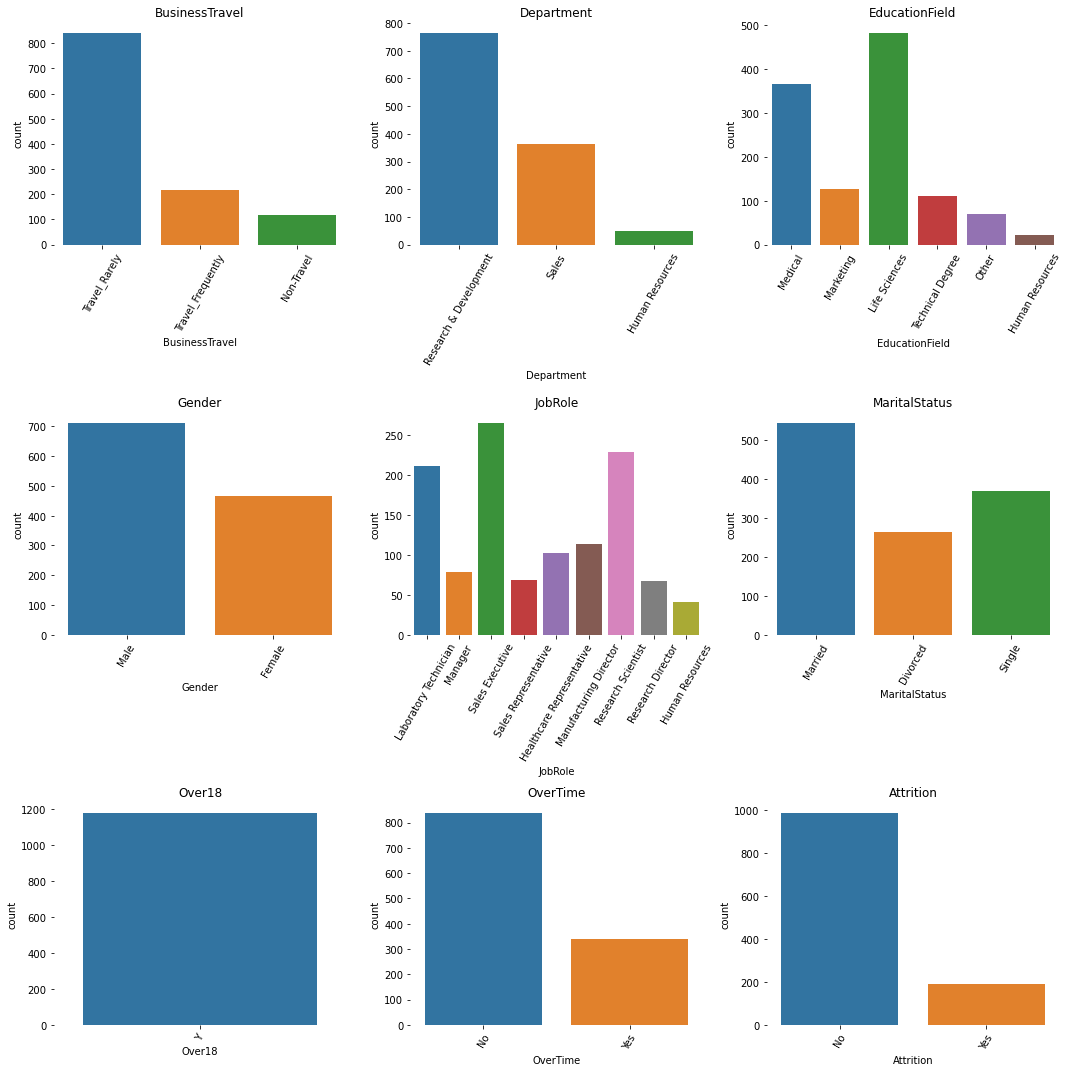

In [20]:
num_rows = 3
num_cols = 3
fig, ax = plt.subplots(num_cols, num_rows, figsize=(15, 15))
row = -1
for i in range(num_rows * num_cols):
    col = i % num_cols
    if col == 0:
        row += 1
    if i < len(cat_features):
        feature = feature_categorical[i]
        plot = sbn.countplot(x=feature, data=train, ax=ax[row,col])
        plot.set_title(feature)
        plot.set_xticklabels(plot.get_xticklabels(),rotation = 60)
        sbn.despine(left=True, bottom=True)
        
fig.tight_layout()

#### Yorumlar

* Over18 değeri kaldırılmalı.

#### Numerik Kolonların Değer Dağılımlarının Görselleştirilmesi

In [21]:
train.dtypes[train.dtypes == "int64"]

Age                         int64
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

In [22]:
feature_numeric = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',  'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'] 

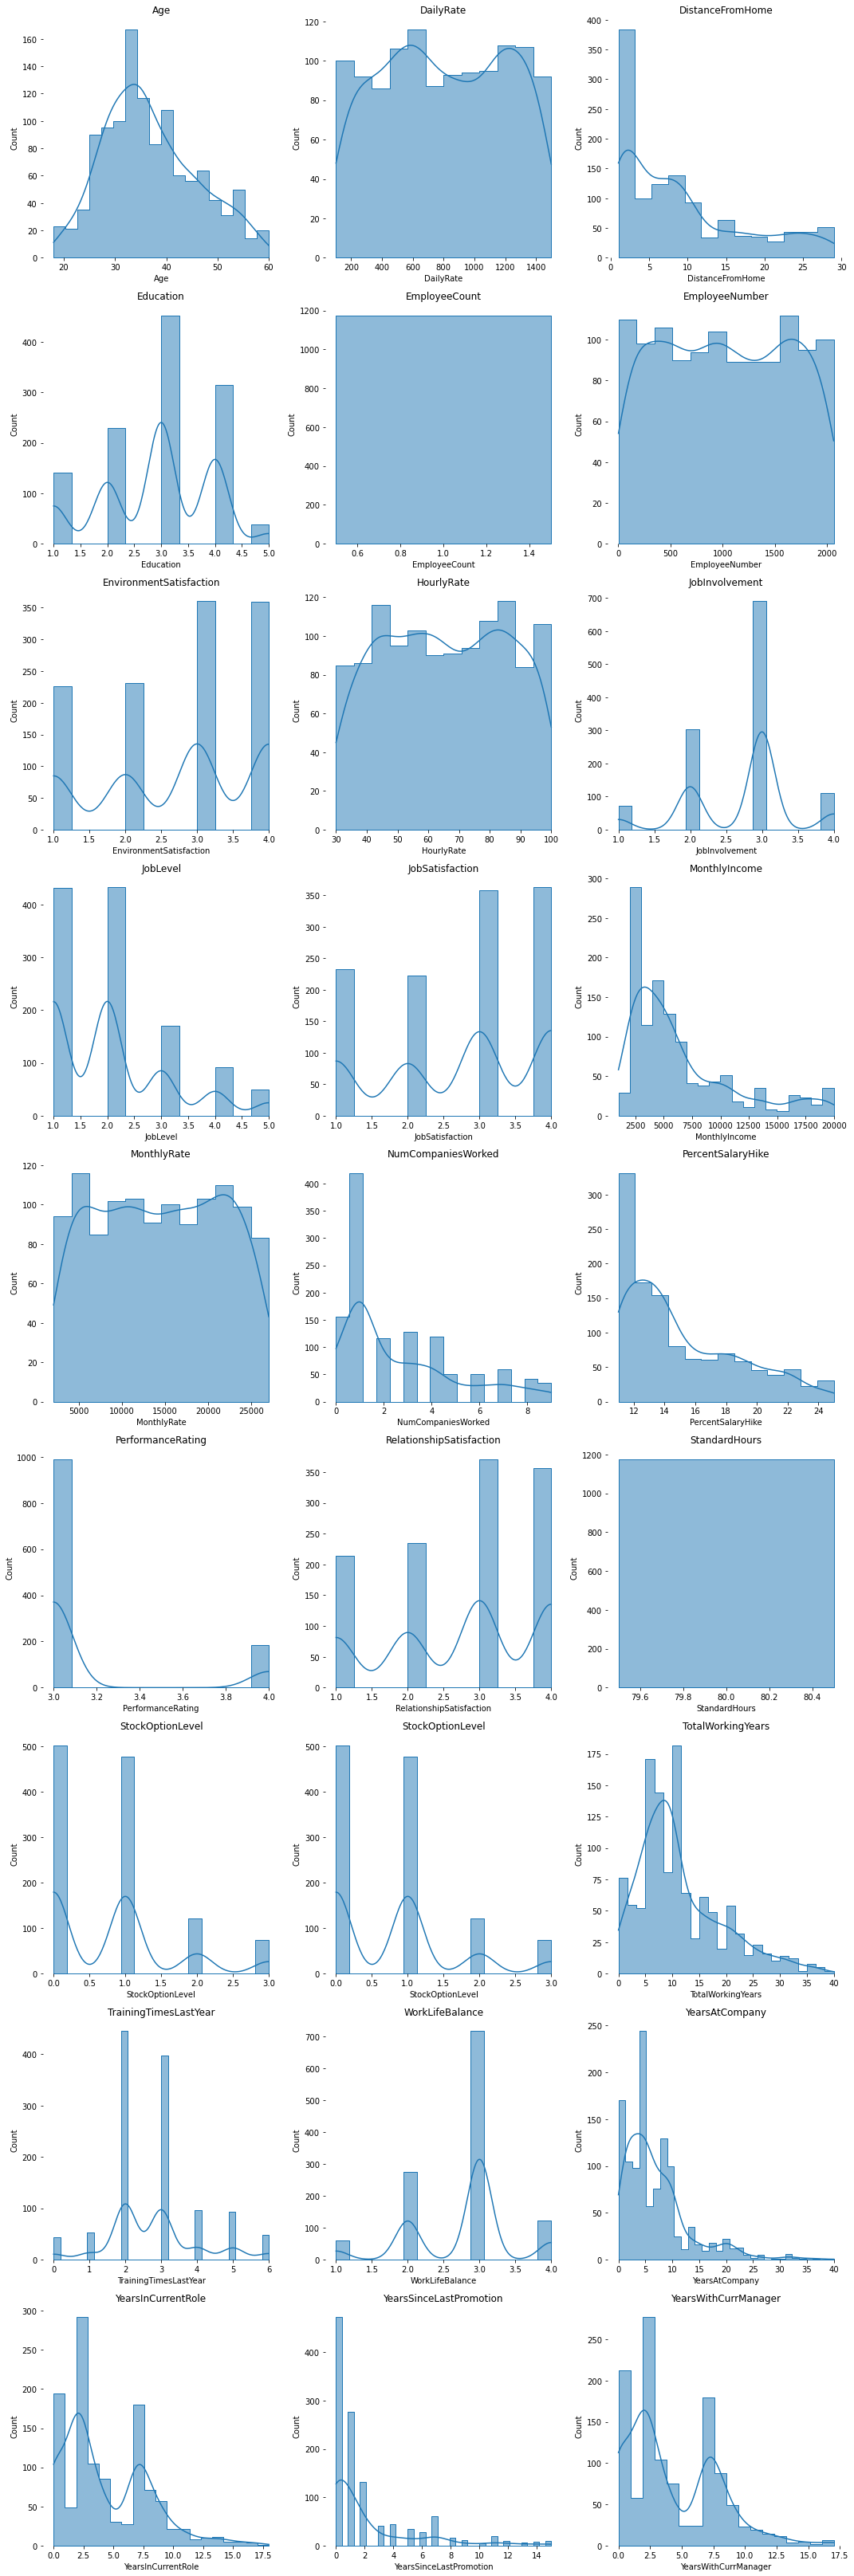

In [23]:
num_rows = 9
num_cols = 3
fig, ax = plt.subplots(num_rows, num_cols, figsize=(15, 45))
row = -1
for i in range(num_rows * num_cols):
    col = i % num_cols
    if col == 0:
        row += 1
    if i < len(feature_numeric):
        feature = feature_numeric[i]
        plot = sbn.histplot(x=feature, data=train, ax=ax[row,col], kde=True, element='step')
        plot.set_title(feature)
        sbn.despine(left=True, bottom=True)
        
fig.tight_layout()

#### Yorumlar

- Standard Hours ve EmployeeCount kaldırılmalı.
- Years at Company 7 yıl civarında yığılmış durumda. 0-5, 5-10, 10> şeklinde üç kategoriye indirgenebilir.
- Yaş dağılımı normal dağılıma benzer görünüyor.
- Job ve relation satisfaction kolonlarında 1,2 seçenekleriyle 3,4 seçenekleri arasında benzer bir ayrım var. Aralarında bir korelasyon olabilir.
- Çalışanların yarısından azının stock option'u bulunmamakta. Eğer 2, 3 olmasıyla alakalı bir korelasyon yoksa stok var - stok yok şekline indirgenebilir.
- Çalışanlar arasında aylık gelir dengesizliği var. Çalışan seviyesine kıyasla düşül-orta-yüksek şeklinde üç kategorili yeni  bir kolon yaratılabilir.
- Mevcut rolde çalışma kolonunda 5 yıl civarında keskin bir ayrım mevcut. <5 >5 şeklinde binary yeni bir kolon yaratılabilir. 
- Çoğu çalışan kısa süre içerisinde terfi almış. Yakın zamanda terfi aldı-almadı şeklinde bir kolon yaratılabilir.
- Bazı çalışanlar diğerlerinden daha fazla zam almış durumda. 
- Şu anda ilk şirketinde çalışmakta olan çok fazla çalışan var. İlk şirketi veya değil şeklinde yeni bir kolon yaratılabilir.
- 5 yıldan fazladır mevcut yöneticiyle veya değil şeklinde bir kolon yaratılabilir.
- Çoğu çalışana iş yeri oldukça yakın. Yakın-orta-uzak şeklinde bir kolon yaratılabilir.
- Toplam çalışma yılında 10 yıl civarı bir yığılma mevcut. Bu veri de kategorik hale getirilebilir.

### Bivariate Analysis

#### Kategorik Kolonlar ile Hedef Arasındaki İlişkilerin Görselleştirilmesi 

In [24]:
train.dtypes[train.dtypes == "O"]

BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
OverTime          object
Attrition         object
dtype: object

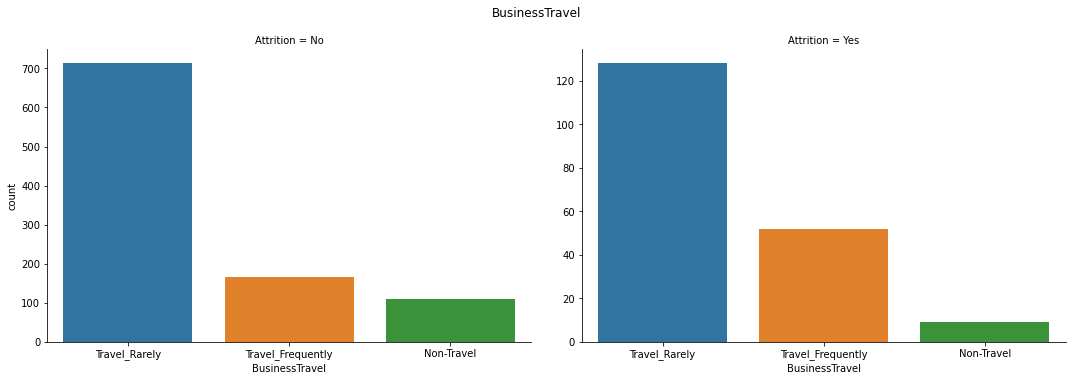

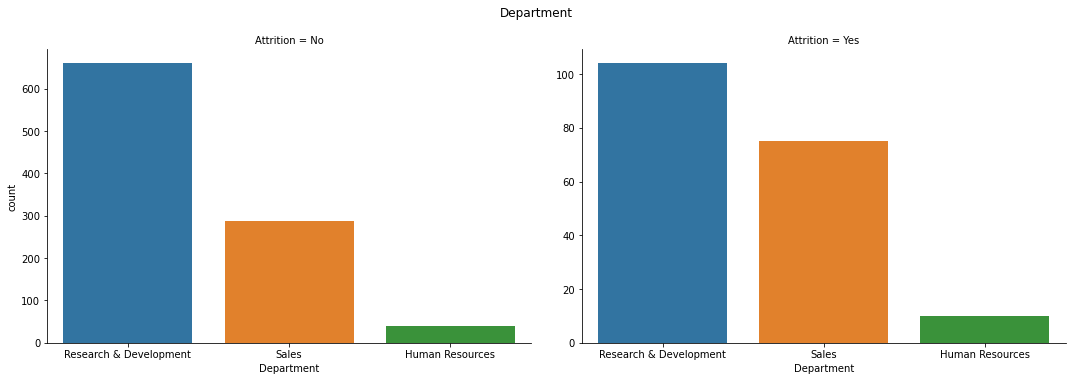

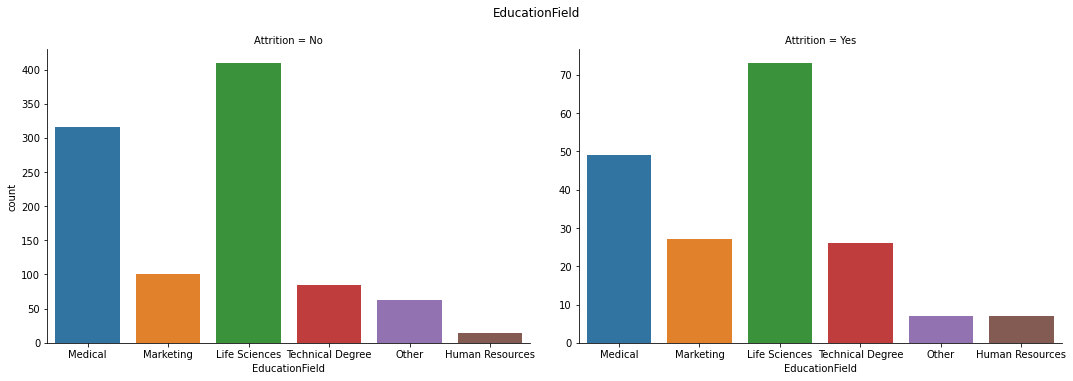

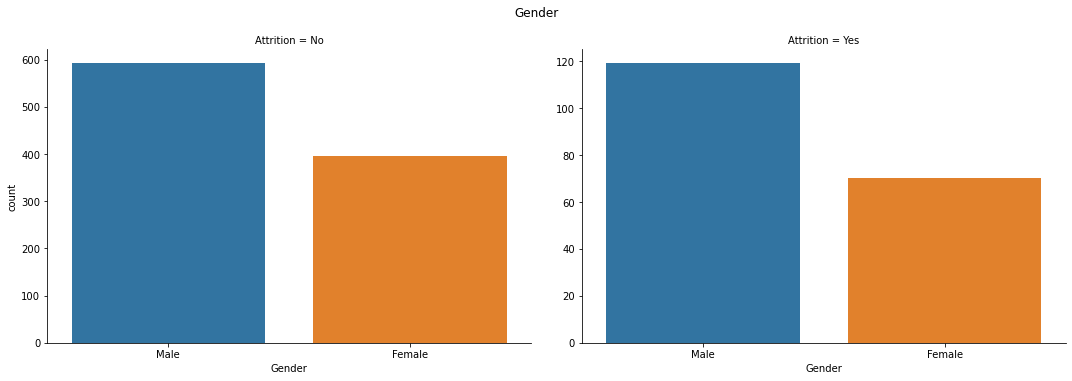

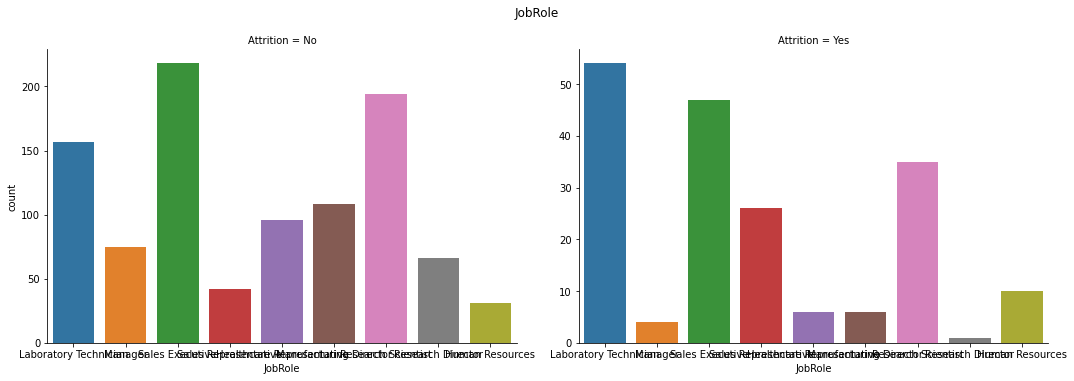

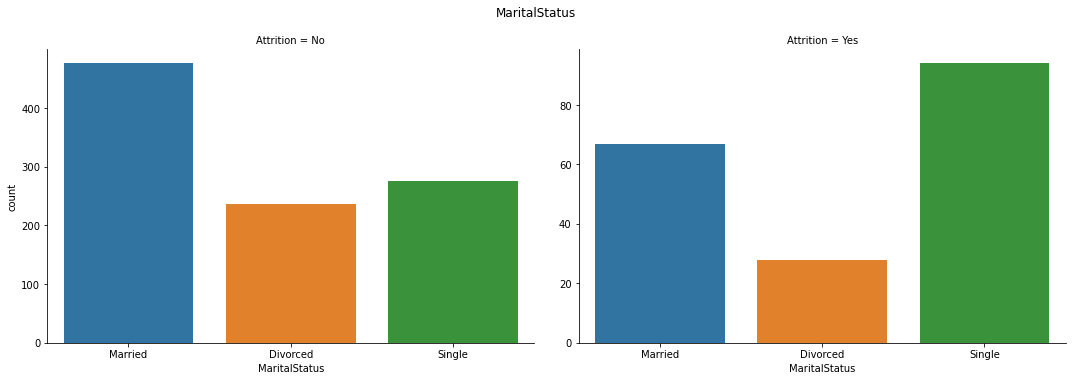

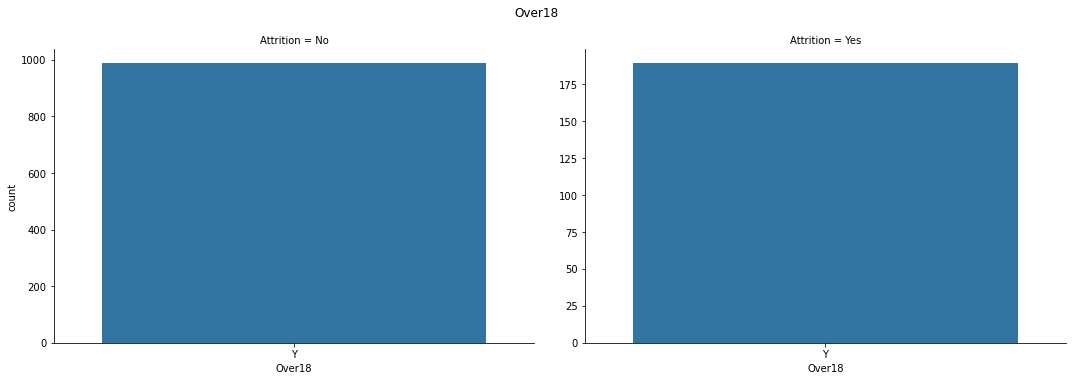

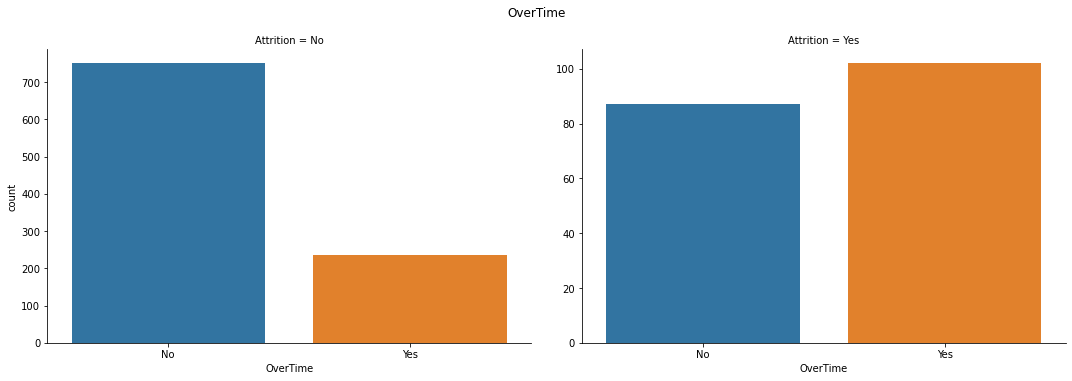

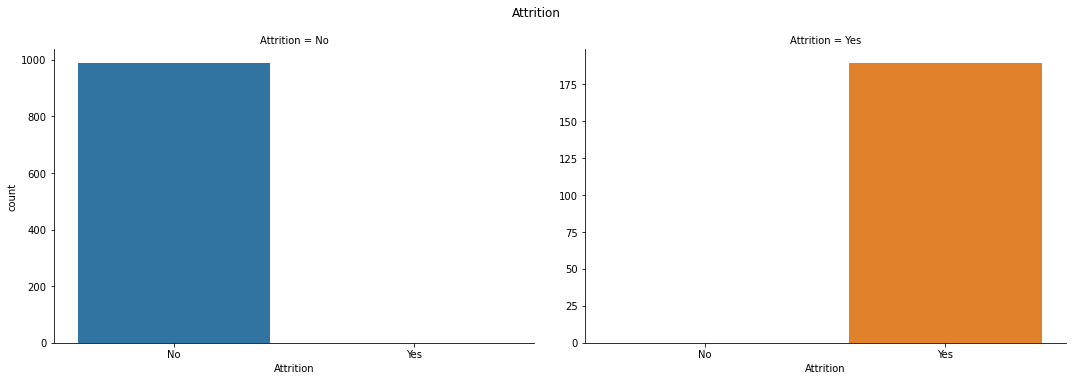

In [25]:
for feature in feature_categorical:
    fig = sbn.catplot(x=feature, kind="count", col="Attrition", sharey=False, data=train, height=5, col_wrap=2, aspect = 1.5)
    fig.fig.suptitle(feature, y=1.05)

* İncelenen üç durumda da işten ayrılma oranı ayrılmama oranından daha düşük olduğu için ve
* Sık seyehat edenlerde işten ayrılmama oranı yüksek olduğu için seyehat etmenin işten ayrılma ile doğrudan bir ilişkisi yoktur.

- İşten ayrılma oranı en yüksek Research&Devolopment departmanındadır ama Sales departmanındakinden çok da fazla değildir.Bu durum departmanda çalışan işçi sayısıyla alakalı olabilir. 
- Net sonuç Human Resource departmanında işten ayrılma oranı azdır.

* Erkekler kadınlara göre daha fazla işten ayrılıyor.

#### Numerik Kolonlar ile Hedef Arasındaki İlişkilerin Görselleştirilmesi

C:\Users\enesc\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\enesc\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


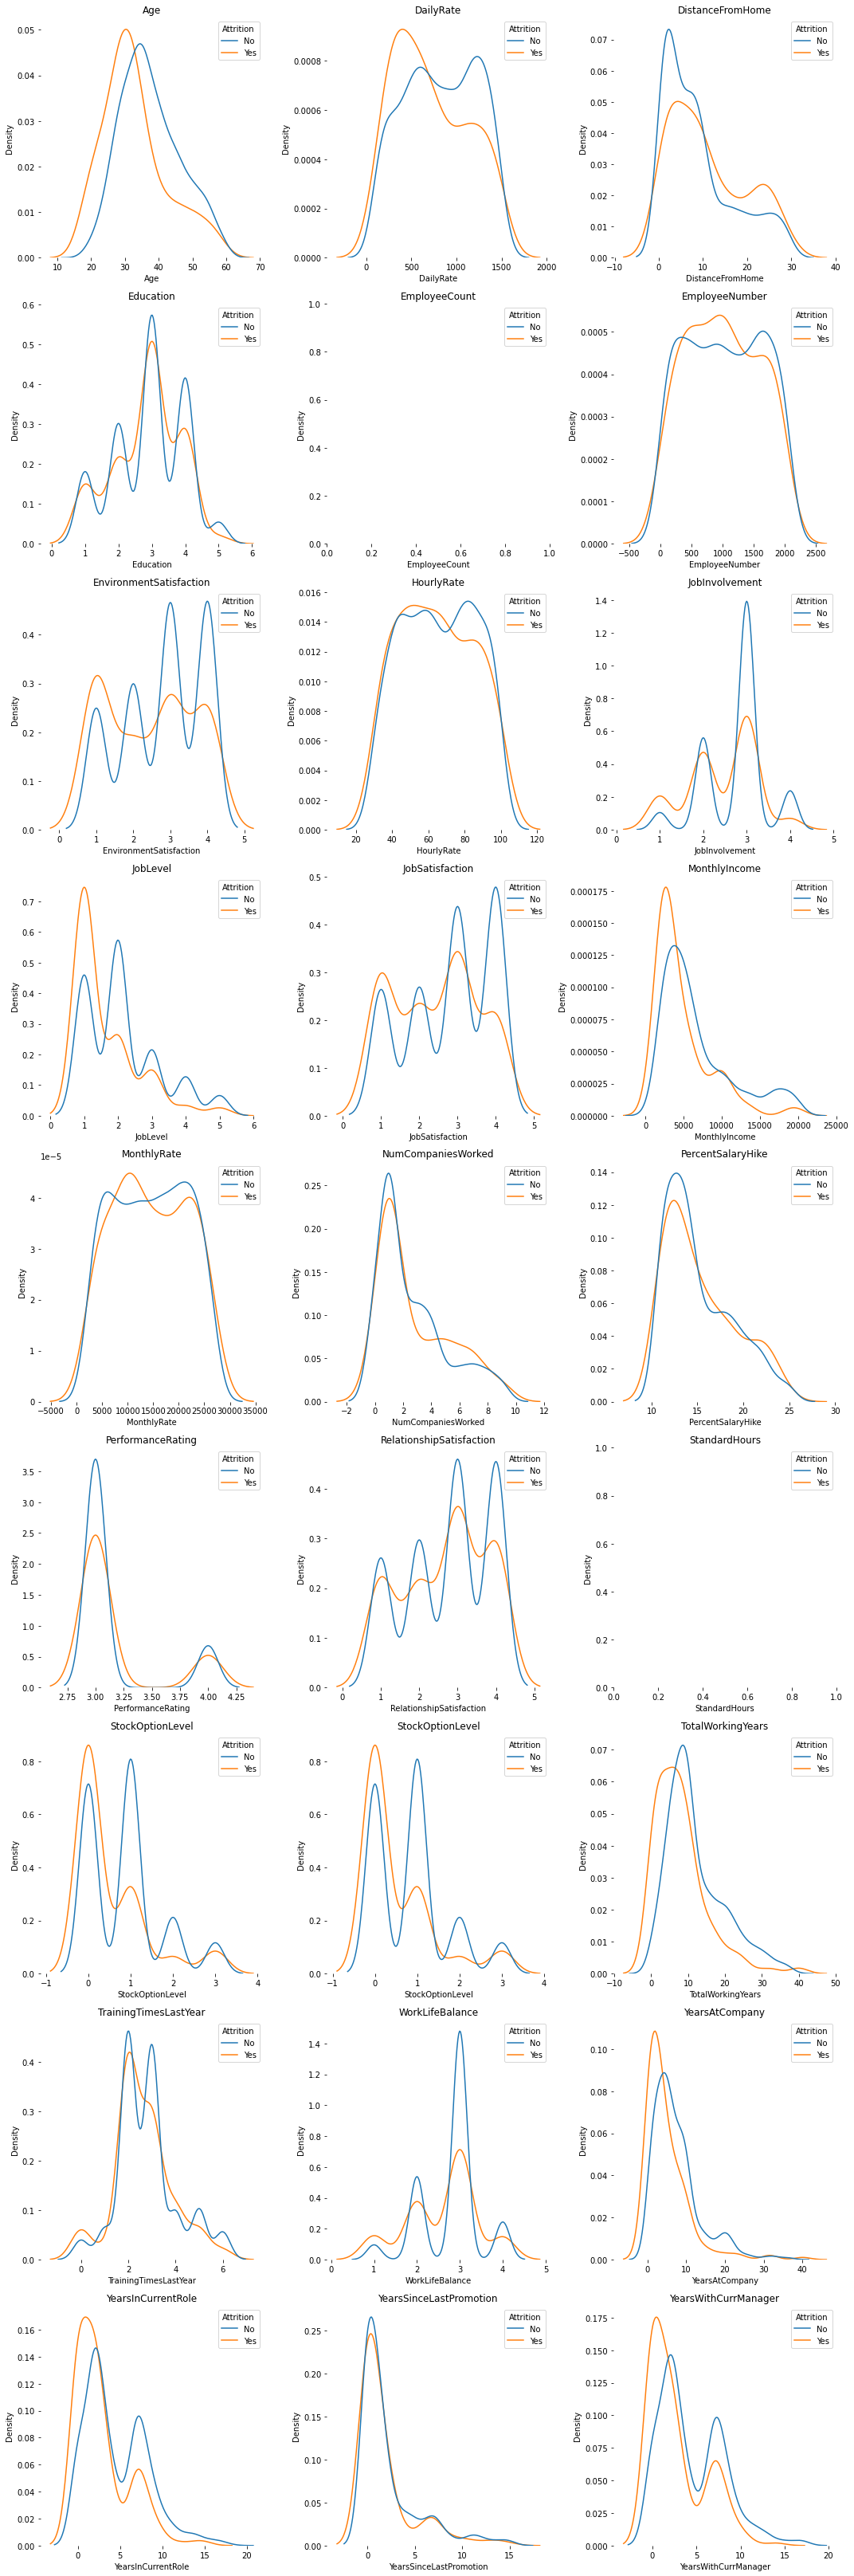

In [26]:
num_rows = 9
num_cols = 3
fig, ax = plt.subplots(num_rows, num_cols, figsize=(15, 45))
row = -1
for i in range(num_rows * num_cols):
    col = i % num_cols
    if col == 0:
        row += 1
    if i < len(feature_numeric):
        feature = feature_numeric[i]
        plot = sbn.kdeplot(x=feature, data=train, common_norm = False, hue="Attrition", ax=ax[row,col])
        plot.set_title(feature)
        sbn.despine(left=True, bottom=True)
        
fig.tight_layout()

- Çoğu kolonda bir attritiona göre farklı dağılım görülebilmekte.
- Environment Satisfaction değeri düşükse Attrition oranı artmakta.
- PerformanceRating değeri düşükse Attrition oranı daha düşük gibi gözüküyor.
- hourly rate 70 in üzerindeyse Attrition daha düşük gözüküyor.
- YearsSinceLastPromotion'ın doğrudan korelasyonu düşük gibi duruyor.
- Stock option var yok şekline getirilebilir.
- Education değerinin doğrudan bir korelasyonu olmayabilir
- Toplam çalışma yılı daha düşük çalışanlar düşük miktarda daha yüksek attrition gösteriyor.
- jobinvolment arttıkça attrition azalıyor gibi duruyor.
- job level 1 olanların attrition oranı ciddi oranda yüksek.
- Genç çalışanlar düşük miktarda daha yüksek attrition gösteriyor.

## Age - Attrition ;

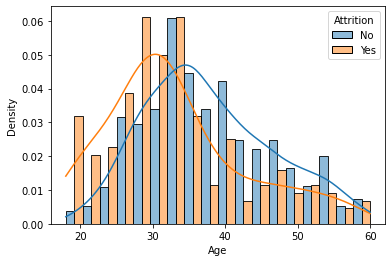

In [27]:
_ = sbn.histplot(data=train, x="Age", stat='density', kde=True, multiple='dodge' , common_norm=False,  hue="Attrition")
##  30 yas altı isten ayrılmaya daha yatkın;

## MonthlyIncome - Attrition ;

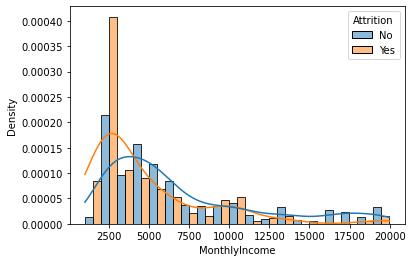

In [28]:
_ = sbn.histplot(data=train, x="MonthlyIncome", stat='density', kde=True, multiple='dodge' , common_norm=False,  hue="Attrition")


## DistanceFromHome - Attrition ;

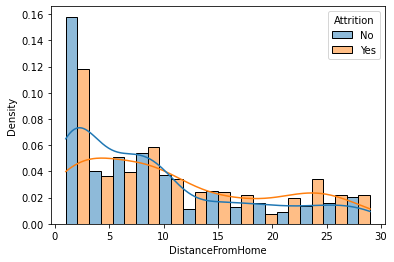

In [29]:
_ = sbn.histplot(data=train, x="DistanceFromHome", stat='density', kde=True, multiple='dodge' , common_norm=False,  hue="Attrition")


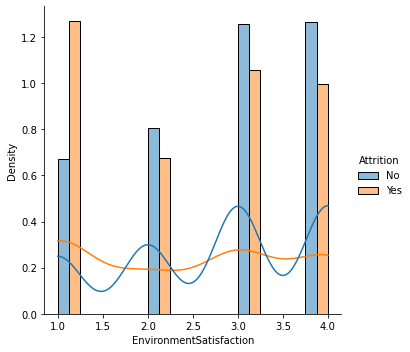

In [30]:
#EnvoriomentSatisfaction - Attrition
_ = sbn.displot(data=train, x="EnvironmentSatisfaction", stat='density', kde=True, multiple='dodge' , common_norm=False,  hue="Attrition")


#### Yorumlar

-

### Multivariate Analysis

## Correlation Matrix

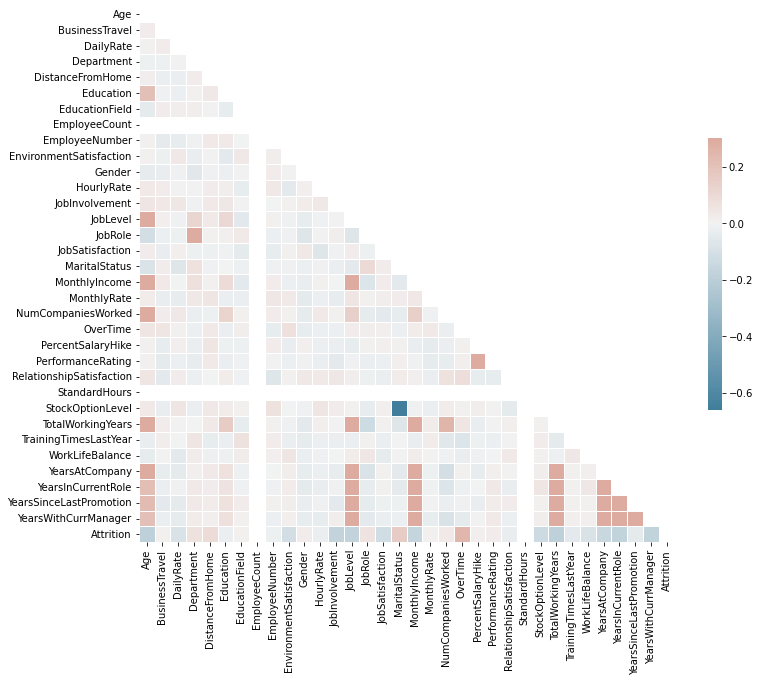

In [31]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
columns_to_encode = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "OverTime", "Attrition"]

train_copy = train.copy()
train_copy[columns_to_encode] = train_copy[columns_to_encode].apply(le.fit_transform)

# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
corr = train_copy.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(12, 10))
cmap = sbn.diverging_palette(230, 20, as_cmap=True)
_ = sbn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Farklı kolonların hedef kolonla ilişkisi analizi

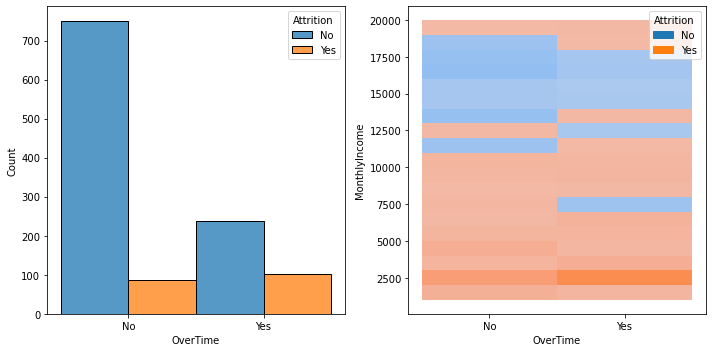

In [32]:
## OverTime-Attrition-MonthlyIncome arasındaki ilişki?
fig, ax = plt.subplots(1,2, figsize=(10, 5))
_ = sbn.histplot(x = "OverTime", hue = "Attrition", data = train, multiple ='dodge', ax=ax[0])
_ = sbn.histplot(data = train, x = "OverTime", y = "MonthlyIncome", hue = "Attrition", ax=ax[1])

plt.tight_layout()

*  Overtime ile Attrition arasında ciddi ilişki vardır, Overtime yapanların işten ayrılma oranı çok yüksektir.
* Ayrıca, işten ayrılma gösterenlerin MonthlyIncome da 2500 bandında yoğunlaştığı görülmektedir.

* Maaş aralığı 2500 civarında yoğunlukta olduğu için işten ayrılma oranı da yüksek görünmektedir ama ciddi bir etkisi olduğunu söyleyemeyiz.
* OverTime yapanlar ile yapmayanların aylık kazançları arasında fark yok.

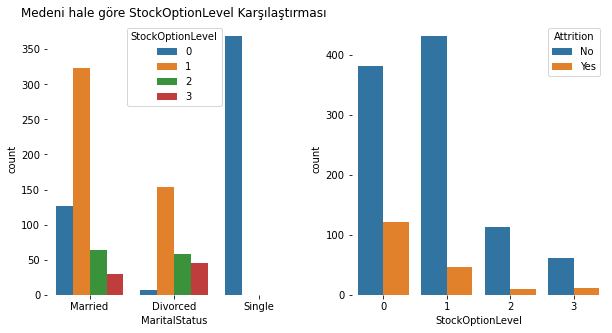

In [33]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
_ =sbn.countplot(x="MaritalStatus", hue="StockOptionLevel", ax=ax[0], data=train).set_title("Medeni hale göre StockOptionLevel Karşılaştırması")
_ = sbn.countplot(x="StockOptionLevel", hue= "Attrition", ax=ax[1], data = train)
sbn.despine(left=True, bottom=True)

* Bekar olanların Stock sahibi olmadığı görülüyor.
* 2 ve 3 stock sahibi olanların işten ayrılma oranı düşük görünüyor.Bu değerler birleştirilebilir ve stok sahibi ve değil olarak düzenlenebilir.
* Stock sahibi olmayanların işten ayrılma oranı yüksek.

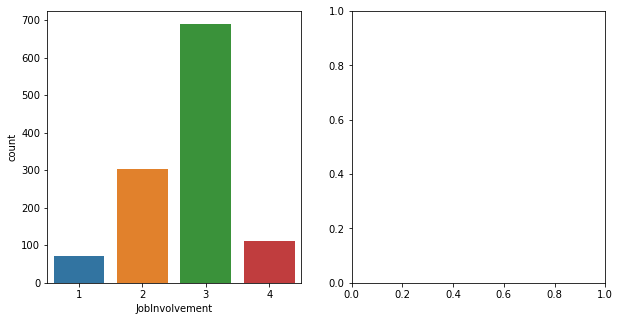

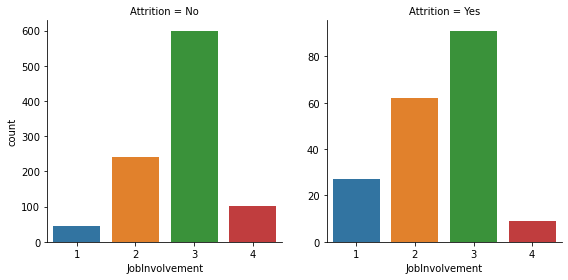

In [34]:
## JobInvolvement - Attrition
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
_ = sbn.countplot(x = "JobInvolvement", data = train, ax=ax[0])
_ = sbn.catplot(x="JobInvolvement", col="Attrition", data = train, kind="count", height= 4, sharey = False )

* JobInvolvement da ın düşük olan 1 değerinde işten ayrılma oranı yüsektir görülmektedir.

C:\Users\enesc\anaconda3\lib\site-packages\seaborn\categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


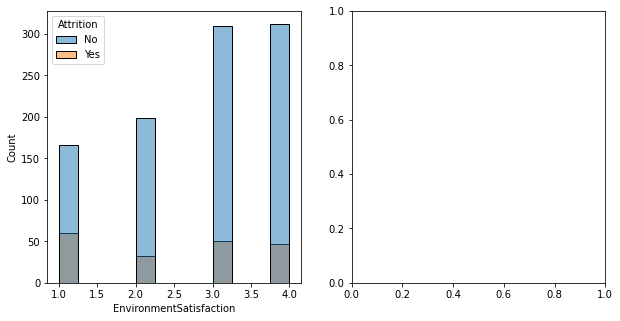

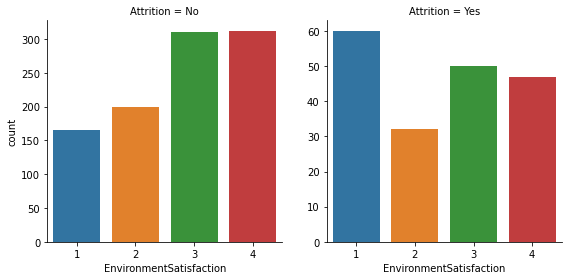

In [35]:
## EnvironmentSatisfaction - Attrition
fig,ax = plt.subplots(1,2, figsize=(10,5))
_ = sbn.catplot(x="EnvironmentSatisfaction", kind="count", col="Attrition", sharey=False, data=train, height=4, col_wrap=2, ax=ax[1])
_ = sbn.histplot(x="EnvironmentSatisfaction", hue="Attrition", data=train, ax=ax[0])

* EnvironmentSatisfaction değeri düşük olanlarda işten ayrılma daha yüksektir. Özellikle 1 değerinde görülmektedir.

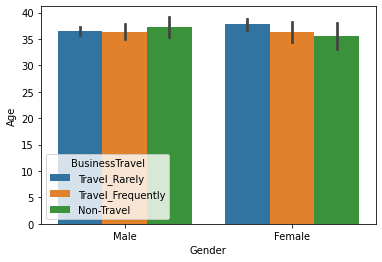

In [36]:
# Yaşına ve cinsiyetine göre gezmesi önemli mi ?

# Age: count
# gender : binary
# BusinessTravel : binary

_ = sbn.barplot(data = train, x = "Gender", y = 'Age', hue = 'BusinessTravel')

* Önemli bir fark görülmemekte.

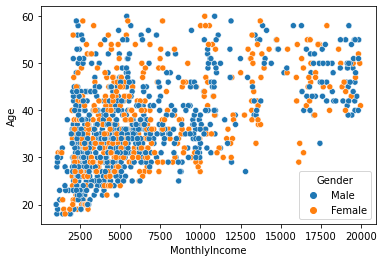

In [37]:
# Yasa göre cinsiyet gelir dagılımı 

# Age : contiuous
# Gender : binary 
# Gelir Durumu : Count

_ = sbn.scatterplot(data = train, x = "MonthlyIncome", y = 'Age', hue = 'Gender')

* Aykırı değerler dışında maaş üzerinde cinsiyet etkisi görülmemekte.

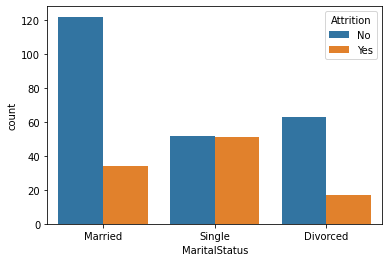

In [38]:
# Marital Status : binary
# Overtime : binary
# Attrition : Binary
_ = sbn.countplot(data=train[train['OverTime'] == 'Yes'], x="MaritalStatus", hue='Attrition')

* Fazla mesai yapanların evlilik durumlarına göre işten ayrılmayla ilişkisi yoktur. 

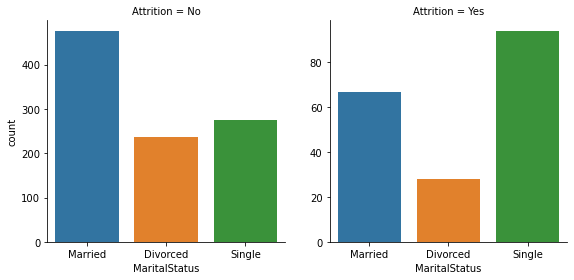

In [39]:
## Evlilik ile İşten ayrılma ilişkisi;

_ = sbn.catplot(x="MaritalStatus", kind="count", col="Attrition", sharey=False, data=train, height=4, col_wrap=3)


* Bekar olanların işten ayrılma oranı daha yüksektir.

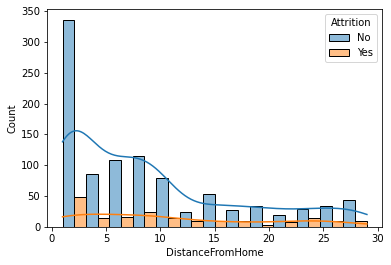

In [40]:
## Eve uzaklık ile işten Ayrılma İlişkisi;
_ = sbn.histplot(data=train, x="DistanceFromHome", stat='count', kde=True, multiple='dodge' , common_norm=False,  hue="Attrition")


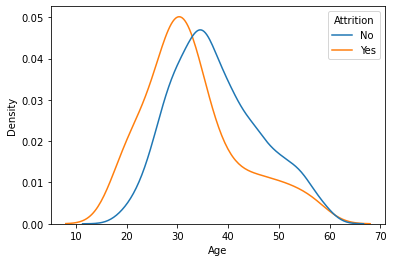

In [41]:
# Age
# Attrition
_ = sbn.kdeplot(data=train, x="Age", hue='Attrition', common_norm = False)

* 25-30 yaş arasının işten ayrılma oranı daha yüksektir.


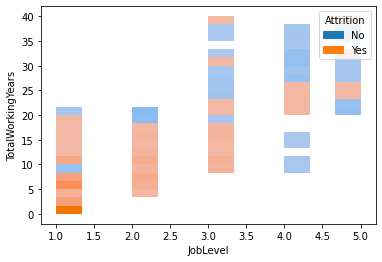

In [42]:
## Çalıştığı yıla göre JobLevel iliskisi

# JobLevel : Binary
# TotalWorkingYears : Countinuous
# Attrition : Binary

_ = sbn.histplot(data=train, x="JobLevel", y='TotalWorkingYears', multiple='stack', hue="Attrition")

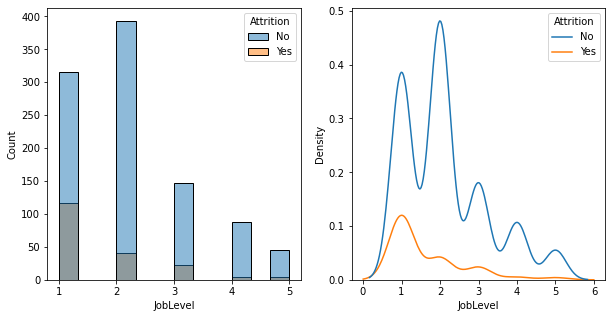

In [43]:
##Joblevel-Attrition ilişkisi;
fig,ax = plt.subplots(1,2, figsize=(10,5))
_ = sbn.histplot(x="JobLevel", hue="Attrition", data=train, ax=ax[0])
_ = sbn.kdeplot(x="JobLevel", hue="Attrition", data=train, ax=ax[1])

* JobLevel seviyesi 1 olanlarda işten ayrılma oranı yüksektir.

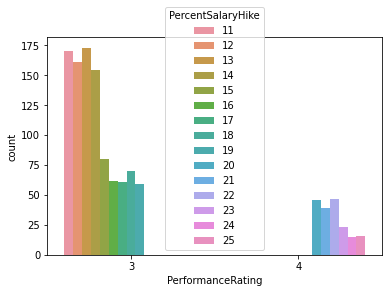

In [44]:
# PerformanceRating-PercentSalaryHike - Attrition

#PerformanceRating : Binary
#PercentSalaryHike : Continuous
#Attrition : Binary
# JobSatisfaction ? 

_ = sbn.countplot(data=train, x="PerformanceRating", hue='PercentSalaryHike')

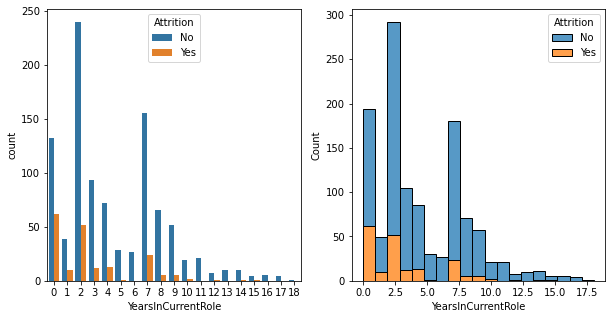

In [45]:
#YearsInCurrentRole-Attrition
fig,ax = plt.subplots(1,2, figsize=(10,5))
_ = sbn.countplot(x="YearsInCurrentRole", hue="Attrition", data=train, ax=ax[0])
_ = sbn.histplot(x="YearsInCurrentRole", hue = "Attrition", multiple='stack', data=train, ax=ax[1])

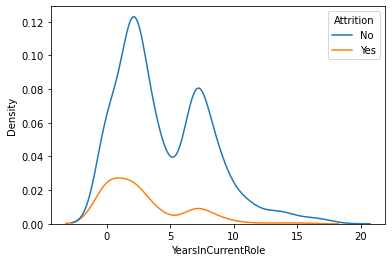

In [46]:
_ = sbn.kdeplot(x = "YearsInCurrentRole", hue="Attrition", data=train)

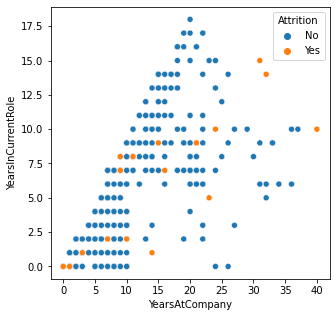

In [47]:
fig = plt.subplots(1, figsize=(5,5))
_ = sbn.scatterplot(x="YearsAtCompany", y="YearsInCurrentRole", hue = "Attrition", data=train)

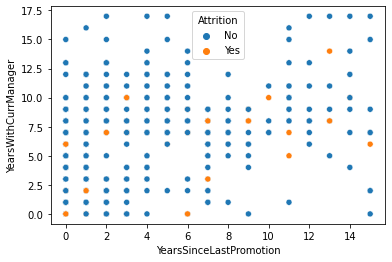

In [48]:
_ = sbn.scatterplot(x="YearsSinceLastPromotion", y="YearsWithCurrManager", hue="Attrition", data=train)

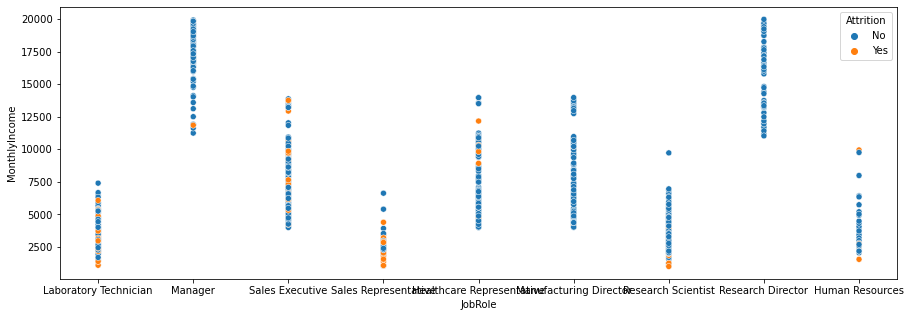

In [49]:
## JobRole-MonthlyIncome-Attrition

fig,ax = plt.subplots(1, figsize=(15,5))
_ = sbn.scatterplot(x="JobRole", y="MonthlyIncome", hue="Attrition", data=train)

* Laboratory Technician ve Sales Representetive iş rollerinden işten ayrılma oranı yüksektir.

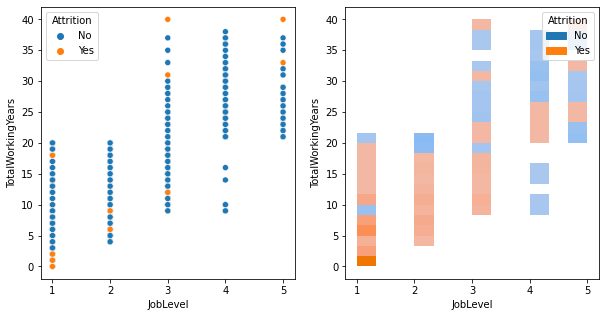

In [50]:
fig,ax = plt.subplots(1,2, figsize=(10,5))
_ = sbn.scatterplot(x = "JobLevel", y ="TotalWorkingYears", hue = "Attrition",  data = train, ax=ax[0])
_ = sbn.histplot(x="JobLevel", y="TotalWorkingYears", hue = "Attrition",data = train, ax=ax[1])

* JobLevel1 de işten çıkma oranı yüksektir.


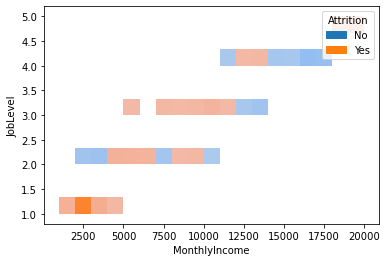

In [51]:
_ = sbn.histplot(x="MonthlyIncome", y="JobLevel", data=train, hue = "Attrition",  multiple="stack", stat="density")

* JobLevel3 de maaş kaynaklı işten ayrılma durumu vardır.

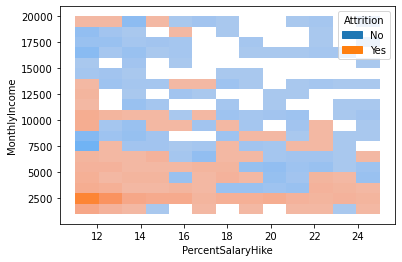

In [52]:
_ = sbn.histplot(x="PercentSalaryHike", y="MonthlyIncome",  multiple="stack", stat="density", data=train, hue="Attrition",)

* Düşük maaş ve düşük PercentSalaryHike işten ayrılma oranını arttırmaktadır.

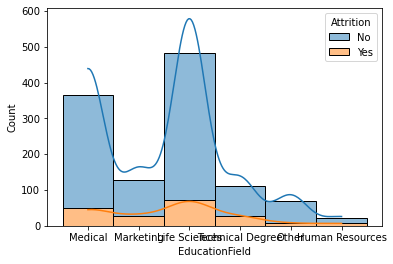

In [53]:
_ = sbn.histplot(x="EducationField", hue = "Attrition", multiple='stack', data=train, kde=True)

### Veri Analizi Yorumları

-

<hr style="height:0.5px;border-width:0;color:black;background-color:black">


## Veri Düzenleme

In [54]:
train_fix_2 = train.copy()
train_fix_2.shape

(1176, 35)

In [55]:
train_fix = train.copy()
train_fix.shape



(1176, 35)

In [56]:
train_fix

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,30,Travel_Rarely,911,Research & Development,1,2,Medical,1,1989,4,...,80,0,12,6,2,12,8,1,7,No
1,48,Travel_Frequently,365,Research & Development,4,5,Medical,1,1644,3,...,80,1,23,3,3,2,2,2,2,No
2,27,Travel_Rarely,1469,Research & Development,1,2,Medical,1,497,4,...,80,1,5,2,3,5,2,0,4,No
3,34,Travel_Rarely,704,Sales,28,3,Marketing,1,2035,4,...,80,2,8,2,3,8,7,1,7,No
4,23,Travel_Frequently,638,Sales,9,3,Marketing,1,2023,4,...,80,1,1,3,2,1,0,1,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,22,Travel_Rarely,217,Research & Development,8,1,Life Sciences,1,1019,2,...,80,1,4,3,2,4,3,1,1,No
1172,30,Travel_Rarely,1275,Research & Development,28,2,Medical,1,441,4,...,80,2,11,2,3,10,8,1,9,No
1173,40,Non-Travel,1151,Research & Development,9,5,Life Sciences,1,287,4,...,80,1,5,5,1,3,2,0,2,No
1174,34,Travel_Frequently,658,Research & Development,7,3,Life Sciences,1,147,1,...,80,0,9,3,3,9,7,0,6,Yes


In [57]:
train_fix["Attrition"] = train_fix["Attrition"].map({"Yes": 1, "No": 0})

In [58]:
train_fix.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [59]:
train_fix.shape

(1176, 35)

#### Tecrübenin kategorik hale getirilmesi

In [60]:
bins = pd.IntervalIndex.from_tuples([(-1, 5), (5, 10), (10, 15), (15,100)])
cat_YearsAtCompany = pd.cut(train_fix["YearsAtCompany"].to_list(), bins)
cat_YearsAtCompany.categories = [0,1,2,3]

In [61]:
train_fix["YearsAtCompanyCat"] = cat_YearsAtCompany


In [62]:
train_fix["YearsAtCompanyCat"].corr(train_fix["Attrition"])

-0.14172852265465505

#### StockOptionLevel Kategorik hale getirilmesi

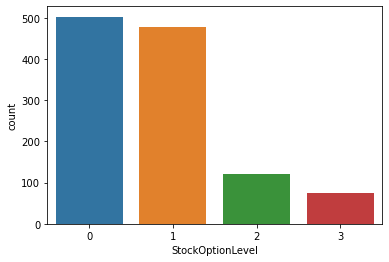

In [63]:
_ = sbn.countplot(x="StockOptionLevel", data=train_fix)

In [64]:
bins = pd.IntervalIndex.from_tuples([(-1,0), (0,3)])
cat_StockOption = pd.cut(train_fix["StockOptionLevel"].to_list(), bins)
cat_StockOption.categories = [0,1]

In [65]:
train_fix["StockOptionCat"] = cat_StockOption

In [66]:
train_fix["StockOptionCat"].corr(train_fix["Attrition"])

-0.19262347853379833

In [67]:
train_fix["StockOptionCat"].unique()

[0, 1]
Categories (2, int64): [0 < 1]

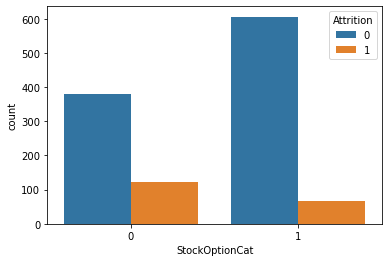

In [68]:
_ = sbn.countplot(x="StockOptionCat", data=train_fix, hue = "Attrition")

#### YearsInCurrentRole kategorik hale getirilmesi

In [69]:
train_fix["YearsInCurrentRole"].corr(train_fix["Attrition"])

-0.18072080720917208

In [70]:
bins = pd.IntervalIndex.from_tuples([(-1,4), (4,30)])
cat_YearsInCurrentRole = pd.cut(train_fix["YearsInCurrentRole"].to_list(), bins)
cat_YearsInCurrentRole.categories = [0,1]

In [71]:
train_fix["YearsInCurrentRoleCat"] = cat_YearsInCurrentRole

In [72]:
train_fix["YearsInCurrentRoleCat"].corr(train_fix["Attrition"])

-0.15466969928289678

In [73]:
train_fix["YearsInCurrentRoleCat"].unique()

[1, 0]
Categories (2, int64): [0 < 1]

#### YearsSinceLastPromotion kategorik halegetirilmesi

In [74]:
train_fix["YearsSinceLastPromotion"].corr(train_fix["Attrition"])

-0.04376611392396383

In [75]:
bins = pd.IntervalIndex.from_tuples([(-1,2), (2,20)])
cat_YearsSinceLastPromotion = pd.cut(train_fix["YearsSinceLastPromotion"].to_list(), bins)
cat_YearsSinceLastPromotion.categories = [0,1]

In [76]:
train_fix["PromotionLately"] = cat_YearsSinceLastPromotion

In [77]:
train_fix["PromotionLately"].corr(train_fix["Attrition"])

-0.04411271967491287

In [78]:
train_fix["PromotionLately"].unique()

[0, 1]
Categories (2, int64): [0 < 1]

#### YearsWithCurrManager kategorik hale getirilmesi

In [79]:
train_fix["YearsWithCurrManager"].corr(train_fix["Attrition"])

-0.17901798820492554

In [80]:
bins = pd.IntervalIndex.from_tuples([(-1,5), (5,30)])
cat_YearsWithCurrManager = pd.cut(train_fix["YearsWithCurrManager"].to_list(), bins)
cat_YearsWithCurrManager.categories = [0,1]

In [81]:
train_fix["YearsWithCurrManagerCat"] = cat_YearsWithCurrManager

In [82]:
train_fix["YearsWithCurrManagerCat"].corr(train_fix["Attrition"])

-0.11302896486481577

In [83]:
train_fix["YearsWithCurrManagerCat"].unique()

[1, 0]
Categories (2, int64): [0 < 1]

In [84]:
train_fix.shape

(1176, 40)

### Gereksiz Kolonların Silinmesi

* BusinessTravel, Departman, EducationField, MartialStatus metin olarak verilmis, numeric kategorik formata dönüsturulmeli.
* Employecount silinecek.
* EmployeeNumber silinecek.
* StandardHours silinecek.

### Yeni Özniteliklerin Yaratılması (Feature Extraction)

#### Ortalama Attrition Değeri


MeanAttritionYear = TotalWorkingYears / NumCompaniesWorked

In [85]:
train_fix["MeanAttritionYear"] = train_fix["TotalWorkingYears"] / (train_fix["NumCompaniesWorked"] + 1)

In [86]:
train_fix["MeanAttritionYear"].describe()

count    1176.000000
mean        4.184091
std         3.925013
min         0.000000
25%         1.666667
50%         3.000000
75%         5.000000
max        38.000000
Name: MeanAttritionYear, dtype: float64

In [87]:
train_fix["MeanAttritionYear"].corr(train_fix["Attrition"])

-0.1799185432733944

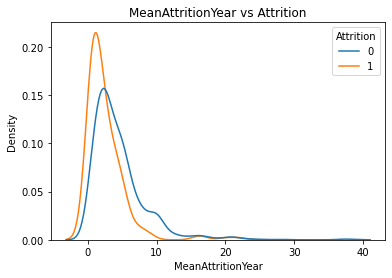

In [88]:
fig = sbn.kdeplot(data=train_fix, x="MeanAttritionYear", hue="Attrition", common_norm=False)
_ = fig.set_title("MeanAttritionYear vs Attrition")

In [89]:
train_fix.shape

(1176, 41)

In [90]:
train_fix["MeanAttritionYear"].values

array([6.        , 7.66666667, 2.5       , ..., 0.5       , 4.5       ,
       0.5       ])

In [91]:
np.isnan(train_fix["MeanAttritionYear"]).any()

False

In [92]:
train_fix["MeanAttritionYear"].describe()

count    1176.000000
mean        4.184091
std         3.925013
min         0.000000
25%         1.666667
50%         3.000000
75%         5.000000
max        38.000000
Name: MeanAttritionYear, dtype: float64

#### PercentSalaryHike/MonthlyIncome 

In [93]:
train_fix["IncomePercentHike"] = train_fix["PercentSalaryHike"] * train_fix["MonthlyIncome"] / 1000

In [94]:
train_fix["IncomePercentHike"].corr(train_fix["Attrition"])

-0.1557285626595277

In [95]:
train_fix["IncomePercentHike"].unique()

array([ 48.724, 380.05 ,  41.976, ...,  68.264, 145.776,  56.487])

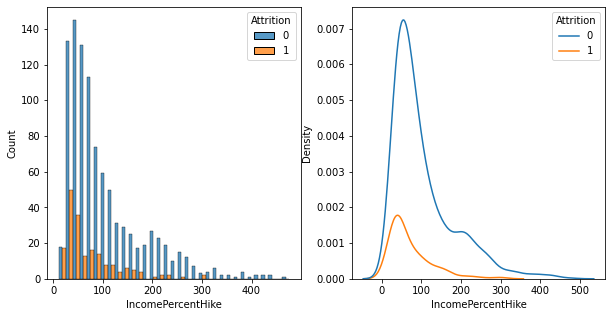

In [96]:
fig,ax = plt.subplots(1,2, figsize=(10,5))
_ = sbn.histplot(x="IncomePercentHike", hue="Attrition", data=train_fix, multiple='dodge', ax = ax[0])
_ = sbn.kdeplot(x="IncomePercentHike", hue="Attrition", data = train_fix, ax=ax[1])

In [97]:
train_fix.shape

(1176, 42)

In [98]:
train_fix["IncomePercentHike"].describe()

count    1176.000000
mean       98.120638
std        75.788654
min        11.099000
25%        45.622500
50%        72.797500
75%       122.245500
max       476.328000
Name: IncomePercentHike, dtype: float64

In [99]:
train_fix["IncomePercentHike"].unique()

array([ 48.724, 380.05 ,  41.976, ...,  68.264, 145.776,  56.487])

#### PerformanceRating ve PercentSalaryHike

In [100]:
train_fix["PerformanceSalaryHike"] = train_fix["PercentSalaryHike"]*train_fix["PerformanceRating"]

In [101]:
train_fix["PerformanceSalaryHike"].corr(train_fix["Attrition"])

0.01768815798687456

In [102]:
train_fix["PerformanceSalaryHike"].describe()

count    1176.000000
mean       49.063776
std        18.064382
min        33.000000
25%        36.000000
50%        42.000000
75%        54.000000
max       100.000000
Name: PerformanceSalaryHike, dtype: float64

In [103]:
train_fix[train_fix==np.inf]=np.nan


In [104]:
train_fix["PerformanceSalaryHike"].unique()

array([ 39, 100,  33,  84,  57,  51,  54,  92,  45,  42,  88,  36,  48,
        80,  96], dtype=int64)

#### Yaşa göre JobLevel 

In [105]:
train_fix["AgeJobLevel"] = train_fix["Age"] / train_fix["JobLevel"] 

In [106]:
train_fix["AgeJobLevel"].corr(train_fix["Attrition"])

0.09475785324125843

In [107]:
train_fix["AgeJobLevel"].describe()

count    1176.000000
mean       21.852069
std         9.990660
min         7.250000
25%        14.312500
50%        19.000000
75%        28.000000
max        59.000000
Name: AgeJobLevel, dtype: float64

In [108]:
np.isnan(train_fix["AgeJobLevel"]).any()

False

In [109]:
train_fix["AgeJobLevel"].unique()

array([30.        , 12.        , 27.        , 17.        , 23.        ,
       14.5       , 15.        , 29.        , 28.        , 18.        ,
       22.5       , 40.        ,  9.66666667, 44.        , 20.5       ,
       13.5       , 10.        , 36.        , 16.5       , 47.        ,
       17.5       , 10.66666667, 24.        , 11.33333333, 19.5       ,
       12.5       , 42.        , 31.        , 58.        ,  9.8       ,
       13.25      , 14.        , 20.        ,  8.8       , 32.        ,
       50.        ,  9.75      , 21.        , 33.        , 10.5       ,
       22.        , 13.        , 10.33333333, 12.66666667, 18.5       ,
       34.        , 11.        , 37.        , 39.        ,  8.4       ,
       43.        , 16.        , 15.5       , 11.25      , 23.5       ,
       19.        , 10.75      , 38.        , 10.25      ,  8.6       ,
       18.66666667, 35.        ,  8.25      , 59.        , 13.75      ,
       17.33333333, 11.66666667, 52.        , 13.33333333, 25.  

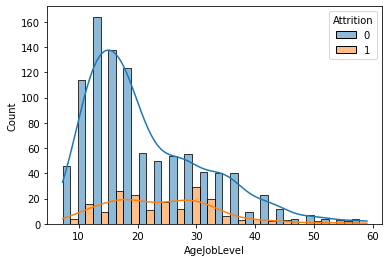

In [110]:
_ = sbn.histplot(x="AgeJobLevel", hue="Attrition", data = train_fix, multiple='dodge', kde=True)

#### Tecrübeye göre JobLevel

In [111]:
train_fix["WorkYearJobLevel"] = train_fix["TotalWorkingYears"] / train_fix["JobLevel"] 

In [112]:
train_fix["WorkYearJobLevel"].corr(train_fix["Attrition"])

-0.12104482918963448

In [113]:
print(np.isnan(train_fix["WorkYearJobLevel"]).any())

False


In [114]:
train_fix["AgeJobLevel"].unique()

array([30.        , 12.        , 27.        , 17.        , 23.        ,
       14.5       , 15.        , 29.        , 28.        , 18.        ,
       22.5       , 40.        ,  9.66666667, 44.        , 20.5       ,
       13.5       , 10.        , 36.        , 16.5       , 47.        ,
       17.5       , 10.66666667, 24.        , 11.33333333, 19.5       ,
       12.5       , 42.        , 31.        , 58.        ,  9.8       ,
       13.25      , 14.        , 20.        ,  8.8       , 32.        ,
       50.        ,  9.75      , 21.        , 33.        , 10.5       ,
       22.        , 13.        , 10.33333333, 12.66666667, 18.5       ,
       34.        , 11.        , 37.        , 39.        ,  8.4       ,
       43.        , 16.        , 15.5       , 11.25      , 23.5       ,
       19.        , 10.75      , 38.        , 10.25      ,  8.6       ,
       18.66666667, 35.        ,  8.25      , 59.        , 13.75      ,
       17.33333333, 11.66666667, 52.        , 13.33333333, 25.  

In [115]:
train_fix["AgeJobLevel"] = round(train_fix["AgeJobLevel"],3)

In [116]:
train_fix["AgeJobLevel"].unique()

array([30.   , 12.   , 27.   , 17.   , 23.   , 14.5  , 15.   , 29.   ,
       28.   , 18.   , 22.5  , 40.   ,  9.667, 44.   , 20.5  , 13.5  ,
       10.   , 36.   , 16.5  , 47.   , 17.5  , 10.667, 24.   , 11.333,
       19.5  , 12.5  , 42.   , 31.   , 58.   ,  9.8  , 13.25 , 14.   ,
       20.   ,  8.8  , 32.   , 50.   ,  9.75 , 21.   , 33.   , 10.5  ,
       22.   , 13.   , 10.333, 12.667, 18.5  , 34.   , 11.   , 37.   ,
       39.   ,  8.4  , 43.   , 16.   , 15.5  , 11.25 , 23.5  , 19.   ,
       10.75 , 38.   , 10.25 ,  8.6  , 18.667, 35.   ,  8.25 , 59.   ,
       13.75 , 17.333, 11.667, 52.   , 13.333, 25.   , 26.   , 11.5  ,
       25.5  , 12.333, 24.5  , 16.333, 11.75 , 12.25 , 19.667, 14.333,
       16.667,  9.   , 46.   , 26.5  ,  9.2  , 15.333, 41.   , 45.   ,
       15.667, 21.5  ,  8.   , 48.   ,  7.8  , 17.667, 13.667, 18.333,
       14.75 , 28.5  , 19.333, 56.   , 10.4  ,  9.6  , 51.   , 14.667,
       49.   ,  7.75 , 14.25 , 27.5  , 12.75 , 11.6  ,  8.2  ,  7.25 ,
      

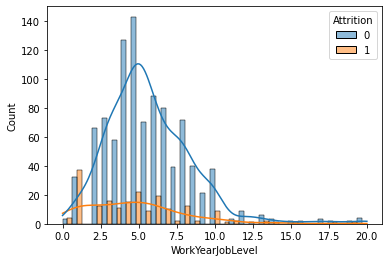

In [117]:
_ = sbn.histplot(x="WorkYearJobLevel", hue="Attrition", data = train_fix, multiple='dodge', kde=True)

#### Çalıştığı ilk şirket mi 

In [118]:
train_fix["NumCompaniesWorked"].corr(train_fix["Attrition"])

0.03238642526251357

In [119]:
bins = pd.IntervalIndex.from_tuples([(-1,0), (0,10)])
cat_FirstCompanyOrNot = pd.cut(train_fix["NumCompaniesWorked"].to_list(), bins)
cat_FirstCompanyOrNot.categories = [0,1]

In [120]:
train_fix["FirstCompanyOrNot"] = cat_FirstCompanyOrNot

In [121]:
train_fix["FirstCompanyOrNot"].corr(train_fix["Attrition"])

0.06874585777548414

In [122]:
train_fix["FirstCompanyOrNot"].unique()

[1, 0]
Categories (2, int64): [0 < 1]

#### 10 Year Work

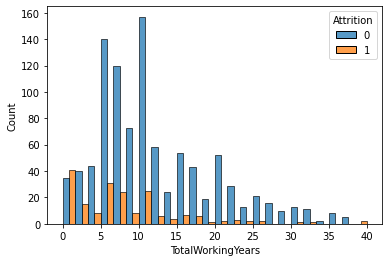

In [123]:
_ = sbn.histplot(x="TotalWorkingYears", data = train_fix, hue="Attrition", multiple ='dodge')

In [124]:
train_fix["TotalWorkingYears"].corr(train_fix["Attrition"])

-0.18986757974929752

In [125]:
bins = pd.IntervalIndex.from_tuples([(-1,10), (10,50)])
cat_WorkTenYears = pd.cut(train_fix["TotalWorkingYears"].to_list(), bins)
cat_WorkTenYears.categories = [0,1]

In [126]:
train_fix["WorkTenYears"] = cat_WorkTenYears

In [127]:
train_fix["WorkTenYears"].corr(train_fix["Attrition"])

-0.13065966971155757

In [128]:
train_fix["WorkTenYears"].values

[1, 1, 0, 0, 0, ..., 0, 1, 0, 0, 0]
Length: 1176
Categories (2, int64): [0 < 1]

#### ManagerVsPromation


In [129]:
train_fix["NumCompEducation"] = train_fix["NumCompaniesWorked"] * train_fix["Education"]

In [130]:
train_fix ["NumCompEducation"].corr(train_fix["Attrition"])

0.017080441475924642

In [131]:
train_fix["NumCompEducation"].unique()

array([ 2, 10,  3,  8, 12,  0, 24,  6,  4, 15,  1, 21,  9, 14, 32, 16, 18,
       27, 36,  5, 35, 20,  7, 28, 25, 45], dtype=int64)

In [132]:
train_fix["NumCompEducation"].dtypes

dtype('int64')

#### JobEnvSatisfaction

In [133]:
train_fix["JobEnvSatisfaction"] = train_fix["EnvironmentSatisfaction"] * train_fix["JobSatisfaction"]

In [134]:
train_fix["JobEnvSatisfaction"].corr(train_fix["Attrition"])

-0.14868632550768343

In [135]:
train_fix["JobEnvSatisfaction"].unique()

array([ 8, 12,  4,  6,  3,  1,  9,  2, 16], dtype=int64)

In [136]:
train_fix["JobEnvSatisfaction"].values

array([ 8, 12,  8, ..., 16,  3,  1], dtype=int64)

#### JobInvSatisfaction

In [137]:
train_fix["JobInvSatisfaction"] = train_fix["JobInvolvement"] * train_fix["JobSatisfaction"]

In [138]:
train_fix["JobInvSatisfaction"].corr(train_fix["Attrition"])

-0.18271275921730432

In [139]:
train_fix["JobInvSatisfaction"].unique()

array([ 6,  8,  3, 12,  9,  4, 16,  2,  1], dtype=int64)

In [140]:
train_fix["IncomeJoblevel"] = train_fix["MonthlyIncome"] * train_fix["JobLevel"] 

In [141]:
train_fix["IncomeJoblevel"].corr(train_fix["Attrition"])

-0.13601884217169774

In [142]:
train_fix["IncomeJoblevel"].unique()

array([ 3748, 60808,  3816, ..., 11550,  9752, 12148], dtype=int64)

In [143]:
train_fix["IncomeJoblevel"].unique()

array([ 3748, 60808,  3816, ..., 11550,  9752, 12148], dtype=int64)

#### MonthlyIncome kategorik hale getirilmesi


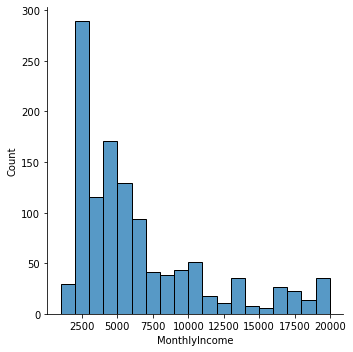

In [144]:
sbn.displot(x="MonthlyIncome", data=train_fix)

In [145]:
train_fix["MonthlyIncome"].describe()

count     1176.000000
mean      6484.924320
std       4672.960274
min       1009.000000
25%       2902.750000
50%       4890.500000
75%       8400.000000
max      19973.000000
Name: MonthlyIncome, dtype: float64

In [146]:
bins = pd.IntervalIndex.from_tuples([(-1,7500), (7500,12500), (12500,30000)])
cat_MonthlyIncome = pd.cut(train_fix["MonthlyIncome"].to_list(), bins)
cat_MonthlyIncome.categories = [0,1,2]

In [147]:
train_fix["cat_MonthlyIncome"] = cat_MonthlyIncome

In [148]:
train_fix["cat_MonthlyIncome"].values

[0, 2, 0, 0, 0, ..., 0, 0, 0, 0, 0]
Length: 1176
Categories (3, int64): [0 < 1 < 2]

In [149]:
train_fix["cat_MonthlyIncome"].corr(train_fix["Attrition"])

-0.11658688631052837

In [150]:
train_fix["cat_MonthlyIncome"].unique()

[0, 2, 1]
Categories (3, int64): [0 < 1 < 2]

#### DistanceFromHome kategorik

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Count'>

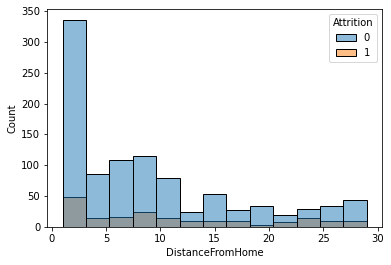

In [151]:
sbn.histplot(x="DistanceFromHome", data=train_fix, hue = "Attrition")

In [152]:
train_fix["DistanceFromHome"].unique()

array([ 1,  4, 28,  9, 29,  2,  6, 20,  7,  3, 10,  8, 22, 15, 18,  5, 17,
       11, 23, 16, 24, 13, 19, 26, 21, 25, 12, 27, 14], dtype=int64)

#### CompanyCurrentRole

In [153]:
train_fix["CompanyCurrentRole"] = train_fix["YearsAtCompany"] / (train_fix["YearsInCurrentRole"] + 1 )

In [154]:
train_fix["CompanyCurrentRole"].corr(train_fix["Attrition"])

-0.06605711884608921

In [155]:
train_fix["CompanyCurrentRole"].unique

<bound method Series.unique of 0       1.333333
1       0.666667
2       1.666667
3       1.000000
4       1.000000
          ...   
1171    1.000000
1172    1.111111
1173    1.000000
1174    1.125000
1175    1.000000
Name: CompanyCurrentRole, Length: 1176, dtype: float64>

#### Age Kategorik


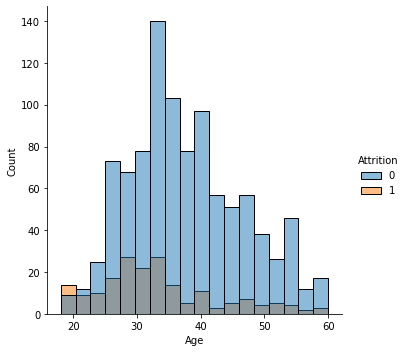

In [156]:
sbn.displot(x="Age", data=train_fix, hue = "Attrition")

In [157]:
bins = pd.IntervalIndex.from_tuples([(-1,25), (25,35), (35,99)])
cat_Age = pd.cut(train_fix["Age"].to_list(), bins)
cat_Age.categories = [0,1,2]

In [158]:
train_fix["cat_Age"] = cat_Age

In [159]:
train_fix["cat_Age"].corr(train_fix["Attrition"])

-0.22388053965651644

In [160]:
train_fix["cat_Age"].unique

<bound method Series.unique of 0       1
1       2
2       1
3       1
4       0
       ..
1171    0
1172    1
1173    2
1174    1
1175    0
Name: cat_Age, Length: 1176, dtype: category
Categories (3, int64): [0 < 1 < 2]>

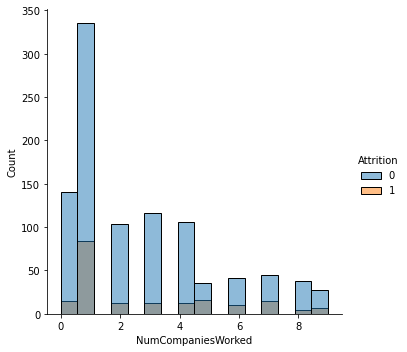

In [161]:
sbn.displot(x="NumCompaniesWorked", data=train_fix, hue = "Attrition")

#### One Hot Encoding

In [162]:
columns_to_encode = [
    "BusinessTravel", "Department", "EducationField", 
    "JobRole", "MaritalStatus", "Gender", "OverTime"
]

In [163]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='if_binary',)
encoder_df = pd.DataFrame(encoder.fit_transform(train_fix[columns_to_encode]).toarray())
column_names = encoder.get_feature_names(columns_to_encode)
column_names

C:\Users\enesc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Gender_Male',
       'OverTime_Yes'], dtype=object)

In [164]:
import pickle 

with open('onehot_encoder_v4.pkl', 'wb') as f:
    pickle.dump(encoder, f)

In [165]:
encoder_df.columns = column_names

In [166]:
train_fix.drop(columns=columns_to_encode, inplace=True, axis=1)
train_fix = train_fix.join(encoder_df)

In [167]:
train_fix.dtypes

Age                         int64
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EmployeeCount               int64
                           ...   
MaritalStatus_Divorced    float64
MaritalStatus_Married     float64
MaritalStatus_Single      float64
Gender_Male               float64
OverTime_Yes              float64
Length: 73, dtype: object

In [168]:
train_fix.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Gender_Male,OverTime_Yes
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,36.859694,804.922619,9.329082,2.897959,1.0,1024.346939,2.724490,65.544218,2.714286,2.058673,...,0.096939,0.056973,0.194728,0.225340,0.057823,0.224490,0.461735,0.313776,0.604592,0.288265
std,9.115610,402.627249,8.109130,1.030495,0.0,606.582338,1.093398,20.202669,0.718154,1.094260,...,0.296000,0.231889,0.396160,0.417984,0.233508,0.417423,0.498746,0.464224,0.489146,0.453148
min,18.000000,102.000000,1.000000,1.000000,1.0,2.000000,1.000000,30.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,466.750000,2.000000,2.000000,1.0,490.250000,2.000000,48.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35.000000,802.000000,7.000000,3.000000,1.0,1012.500000,3.000000,65.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,43.000000,1163.250000,14.000000,4.000000,1.0,1570.250000,4.000000,83.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2065.000000,4.000000,100.000000,4.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [169]:
train_fix.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Gender_Male,OverTime_Yes
0,30,911,1,2,1,1989,4,76,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,48,365,4,5,1,1644,3,89,2,4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,27,1469,1,2,1,497,4,82,3,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,34,704,28,3,1,2035,4,95,2,2,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,23,638,9,3,1,2023,4,33,3,1,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [170]:
df = pd.DataFrame(train_fix)

In [171]:
train_fix.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'YearsAtCompanyCat', 'StockOptionCat', 'YearsInCurrentRoleCat',
       'PromotionLately', 'YearsWithCurrManagerCat', 'MeanAttritionYear',
       'IncomePercentHike', 'PerformanceSalaryHike', 'AgeJobLevel',
       'WorkYearJobLevel', 'FirstCompanyOrNot', 'WorkTenYears',
       'NumCompEducation', 'JobEnvSatisfaction', 'JobInvSatisfaction',
       'IncomeJoblevel', 'cat_MonthlyIncome', 'CompanyCurrentRole', 'cat_Age',

In [172]:
train_fix.dtypes

Age                         int64
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EmployeeCount               int64
                           ...   
MaritalStatus_Divorced    float64
MaritalStatus_Married     float64
MaritalStatus_Single      float64
Gender_Male               float64
OverTime_Yes              float64
Length: 73, dtype: object

In [173]:
train_fix.shape

(1176, 73)

#### Düzeltilmiş data ile Correlation Matrix

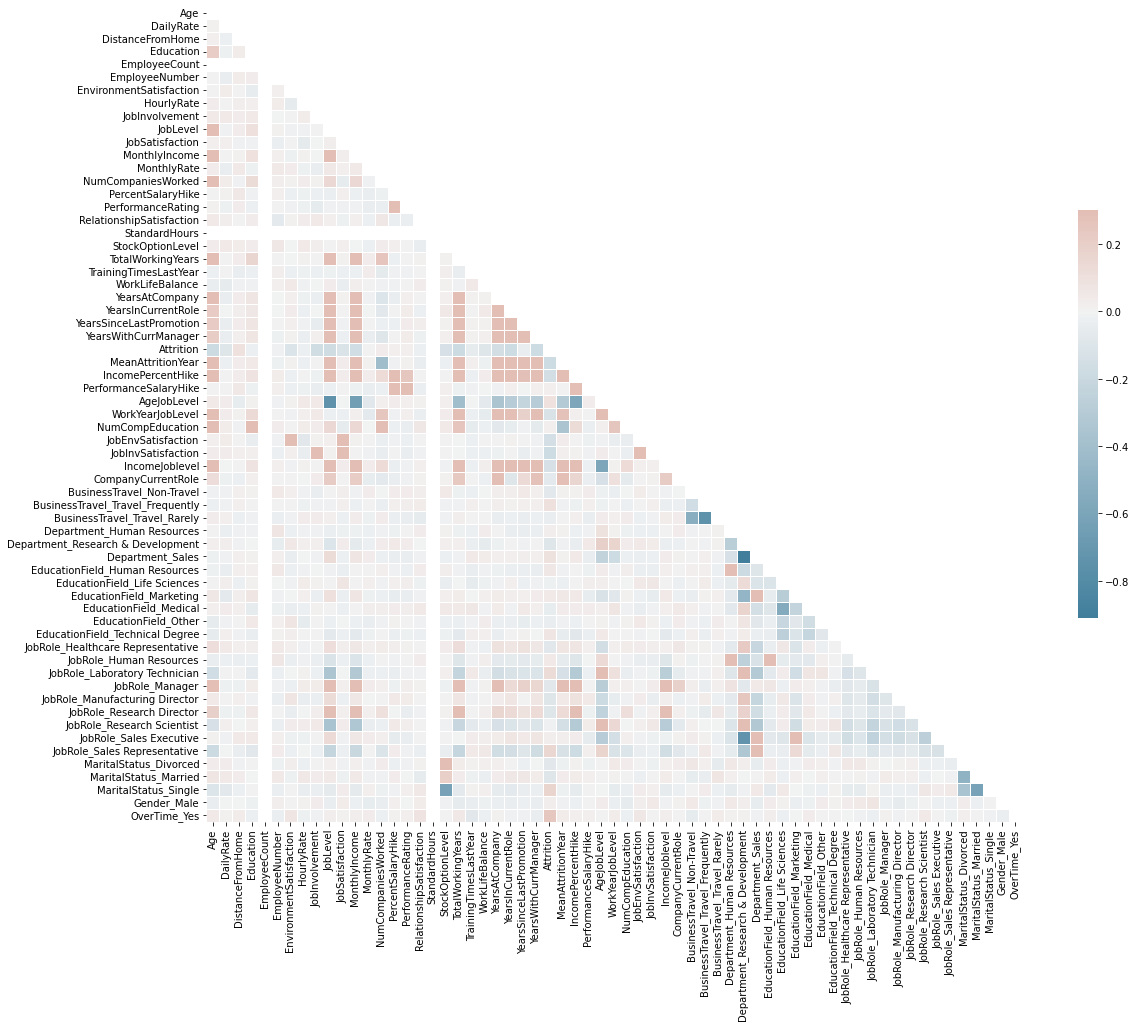

In [174]:
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
corr = train_fix.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 15))
cmap = sbn.diverging_palette(230, 20, as_cmap=True)
_ = sbn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Null Değerlerin Temizlenmesi

### Öznitelik Seçimi (Feature Selection)

In [175]:
corr_matrix = train_fix.corr().abs()
corr_matrix["Attrition"]

Age                       0.188667
DailyRate                 0.093919
DistanceFromHome          0.094491
Education                 0.024083
EmployeeCount                  NaN
                            ...   
MaritalStatus_Divorced    0.080065
MaritalStatus_Married     0.094129
MaritalStatus_Single      0.173122
Gender_Male               0.022409
OverTime_Yes              0.242891
Name: Attrition, Length: 63, dtype: float64

In [176]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
upper.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Gender_Male,OverTime_Yes
Age,NaN,0.007605,0.016341,0.206040,NaN,0.005868,0.006536,0.030195,0.044573,0.525635,...,0.047311,0.195030,0.136894,0.010985,0.189303,0.029533,0.073977,0.106034,0.041847,0.048122
DailyRate,NaN,NaN,0.023193,0.018384,NaN,0.038290,0.039596,0.000717,0.044121,0.011012,...,0.004519,0.017035,0.012681,0.008417,0.004542,0.026476,0.048637,0.076061,0.005678,0.008836
DistanceFromHome,NaN,NaN,NaN,0.037325,NaN,0.036699,0.002459,0.024361,0.034573,0.031966,...,0.018255,0.016768,0.004864,0.040876,0.037924,0.011032,0.032050,0.024514,0.005574,0.036233
Education,NaN,NaN,NaN,NaN,NaN,0.029517,0.047632,0.014320,0.041072,0.101166,...,0.014976,0.052841,0.019528,0.041574,0.085101,0.003836,0.004292,0.001162,0.019331,0.026259
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
threshold1 = 0.9


In [178]:
to_drop = [column for column in upper.columns if any(upper[column] > threshold1)]

print('Silinecek kolon sayısı %d :' % (len(to_drop)))
print(to_drop)

Silinecek kolon sayısı 7 :
['MonthlyIncome', 'IncomePercentHike', 'PerformanceSalaryHike', 'NumCompEducation', 'IncomeJoblevel', 'Department_Sales', 'JobRole_Human Resources']


In [179]:
selection1 = train_fix.drop(columns = to_drop)
selection1.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Gender_Male,OverTime_Yes
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,36.859694,804.922619,9.329082,2.897959,1.0,1024.346939,2.724490,65.544218,2.714286,2.058673,...,0.096939,0.056973,0.194728,0.225340,0.057823,0.224490,0.461735,0.313776,0.604592,0.288265
std,9.115610,402.627249,8.109130,1.030495,0.0,606.582338,1.093398,20.202669,0.718154,1.094260,...,0.296000,0.231889,0.396160,0.417984,0.233508,0.417423,0.498746,0.464224,0.489146,0.453148
min,18.000000,102.000000,1.000000,1.000000,1.0,2.000000,1.000000,30.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,466.750000,2.000000,2.000000,1.0,490.250000,2.000000,48.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35.000000,802.000000,7.000000,3.000000,1.0,1012.500000,3.000000,65.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,43.000000,1163.250000,14.000000,4.000000,1.0,1570.250000,4.000000,83.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2065.000000,4.000000,100.000000,4.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [180]:
selection1.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'YearsAtCompanyCat', 'StockOptionCat', 'YearsInCurrentRoleCat',
       'PromotionLately', 'YearsWithCurrManagerCat', 'MeanAttritionYear',
       'AgeJobLevel', 'WorkYearJobLevel', 'FirstCompanyOrNot', 'WorkTenYears',
       'JobEnvSatisfaction', 'JobInvSatisfaction', 'cat_MonthlyIncome',
       'CompanyCurrentRole', 'cat_Age', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
   

In [181]:
#Selection3

selection3 = train_fix.drop(columns=['Attrition'])

In [182]:
selection3.shape

(1176, 72)

<hr style="height:0.5px;border-width:0;color:black;background-color:black">


## Model Eğitimi 

##  Deneme

In [183]:
from sklearn import metrics

dummy_y_true = [1, 1, 1, 0, 0, 0]
dummy_y_pred = [1, 1, 0, 1, 1, 0]
dummy_y_prob = [0.95, 0.55, 0.05, 0.55, 0.65, 0.10]

acc = metrics.accuracy_score(dummy_y_true, dummy_y_pred)
p = metrics.precision_score(dummy_y_true, dummy_y_pred)
r = metrics.recall_score(dummy_y_true, dummy_y_pred)
f1 = metrics.f1_score(dummy_y_true, dummy_y_pred)

fpr, tpr, thresholds = metrics.roc_curve(dummy_y_true, dummy_y_prob)
roc_auc = metrics.auc(fpr, tpr)

precision, recall, thresholds = metrics.precision_recall_curve(dummy_y_true, dummy_y_prob)
pr_auc = metrics.auc(recall, precision)

In [184]:
pd.DataFrame({
    'acc': acc,
    'p': p,
    'r': r,
    'f1': f1,
    'roc_auc': roc_auc,
    'pr_auc': pr_auc
}, index=['values'])

,acc,p,r,f1,roc_auc,pr_auc
values,0.5,0.5,0.666667,0.571429,0.5,0.65


In [185]:
# roc curve çiz

In [186]:
from sklearn import metrics


def eval_clf(y_true, y_pred):
    acc = metrics.accuracy_score(y_true, y_pred)
    p = metrics.precision_score(y_true, y_pred)
    r = metrics.recall_score(y_true, y_pred)
    f1 = metrics.f1_score(y_true, y_pred)
    
    result = {
        'acc': acc,
        'p': p,
        'r': r,
        'f1': f1
    }
    
    return result


def eval_auc(y_true, y_prob):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_prob)
    precision, recall, thresholds = metrics.precision_recall_curve(y_true, y_prob)
    
    roc_auc = metrics.auc(fpr, tpr)
    pr_auc = metrics.auc(recall, precision)
    
    result = {
        'roc_auc': roc_auc,
        'pr_auc': pr_auc
    }
    
    return result

    
def eval_threshold(y_true, y_prob, threshold):
    y_pred = np.where(np.array(y_prob) > threshold, 1, 0)

    return eval_clf(y_true, y_pred)

In [187]:
dummy_y_true = [1, 1, 1, 0, 0, 0]
dummy_y_pred = [1, 1, 0, 1, 1, 0]
dummy_y_prob = [0.95, 0.55, 0.05, 0.55, 0.65, 0.10]


print('-' * 10)
print('res_clf')
res_clf = eval_clf(dummy_y_true, dummy_y_pred)
print(res_clf)

print('-' * 10)
print('res_auc')
res_auc = eval_auc(dummy_y_true, dummy_y_prob)
print(res_auc)

print('-' * 10)
print('res_thr threshold=0.5')
res_thr = eval_threshold(dummy_y_true, dummy_y_prob, threshold=0.5)
print(res_thr)

print('-' * 10)
print('res_thr threshold=0.70')
res_thr = eval_threshold(dummy_y_true, dummy_y_prob, threshold=0.7)
print(res_thr)

----------
res_clf
{'acc': 0.5, 'p': 0.5, 'r': 0.6666666666666666, 'f1': 0.5714285714285715}
----------
res_auc
{'roc_auc': 0.5, 'pr_auc': 0.6499999999999999}
----------
res_thr threshold=0.5
{'acc': 0.5, 'p': 0.5, 'r': 0.6666666666666666, 'f1': 0.5714285714285715}
----------
res_thr threshold=0.70
{'acc': 0.6666666666666666, 'p': 1.0, 'r': 0.3333333333333333, 'f1': 0.5}


## Gereksiz Kolonların Silinmesi

In [188]:
columns_to_remove = ["EmployeeCount", "StandardHours", "Over18", "EmployeeNumber", 'YearsSinceLastPromotion', 'JobSatisfaction', 'HourlyRate', 'MonthlyRate', 'IncomePercentHike', 'JobInvSatisfaction', 'cat_MonthlyIncome' ]
train_fix = train_fix.drop(columns=columns_to_remove)

In [189]:
train_fix.shape

(1176, 62)

In [190]:
train_fix.dtypes

Age                          int64
DailyRate                    int64
DistanceFromHome             int64
Education                    int64
EnvironmentSatisfaction      int64
                            ...   
MaritalStatus_Divorced     float64
MaritalStatus_Married      float64
MaritalStatus_Single       float64
Gender_Male                float64
OverTime_Yes               float64
Length: 62, dtype: object

In [191]:
y_data = train_fix['Attrition']
X_data = train_fix.drop(columns=['Attrition' 
                                 
                                 
                                 
])

In [192]:
train_fix.shape

(1176, 62)

In [193]:
X_data.shape

(1176, 61)

In [194]:
X_data.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager',
       'YearsAtCompanyCat', 'StockOptionCat', 'YearsInCurrentRoleCat',
       'PromotionLately', 'YearsWithCurrManagerCat', 'MeanAttritionYear',
       'PerformanceSalaryHike', 'AgeJobLevel', 'WorkYearJobLevel',
       'FirstCompanyOrNot', 'WorkTenYears', 'NumCompEducation',
       'JobEnvSatisfaction', 'IncomeJoblevel', 'CompanyCurrentRole', 'cat_Age',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human 

y_data = train_fix_default['Attrition']
X_data = train_fix_default.drop(columns=['Attrition'])

In [195]:
X_data.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager',
       'YearsAtCompanyCat', 'StockOptionCat', 'YearsInCurrentRoleCat',
       'PromotionLately', 'YearsWithCurrManagerCat', 'MeanAttritionYear',
       'PerformanceSalaryHike', 'AgeJobLevel', 'WorkYearJobLevel',
       'FirstCompanyOrNot', 'WorkTenYears', 'NumCompEducation',
       'JobEnvSatisfaction', 'IncomeJoblevel', 'CompanyCurrentRole', 'cat_Age',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human 

In [196]:
print(X_data.shape)
print(y_data.shape)
assert X_data.shape[0] == y_data.shape[0]

(1176, 61)
(1176,)


### Logistic Regression

In [197]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_data,
    y_data.values,
    test_size = 0.25,
    stratify=y_data,
    random_state = 42
)

### Logistic Regression With Scaled Data

In [198]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_val_scaled = sc.transform(X_val)

In [199]:
X_val_scaled.shape

(294, 61)

In [200]:
X_train_scaled.shape

(882, 61)

In [201]:

import pickle 

with open('standard_scaler_v4.pkl', 'wb') as f:
    pickle.dump(sc, f)

In [202]:
class_weight_1_1 ={0:0.43 , 1 : 0.57}
class_weight_1 ={0:0.39 , 1 : 0.61}

In [203]:
from sklearn.linear_model import LogisticRegression
class_weight_1 ={0:0.39 , 1 : 0.61}
classifier = LogisticRegression(#max_iter=10000, random_state = 42, C = 6, solver = 'saga', penalty='elasticnet', fit_intercept=True, intercept_scaling = 0, l1_ratio=0.5 , class_weight = class_weight_1, 
                                #max_iter=1000, random_state = 42, C = 6, solver = 'lbfgs', penalty='l2', multi_class = 'auto', fit_intercept=True, intercept_scaling = 0.3, class_weight = class_weight_1
                                #max_iter=100, random_state = 42, C = 6, solver = 'newton-cg', penalty='l2', class_weight = class_weight_1, fit_intercept=True, intercept_scaling = 0.3
                                max_iter=100, random_state = 42, C = 5, solver = 'liblinear', penalty='l2', fit_intercept=True, intercept_scaling = 0.3, multi_class = 'ovr', class_weight = class_weight_1, #0.0.70329
                                #max_iter=10000, random_state = 42, C = 10, solver = 'sag', penalty='l2', class_weight = class_weight_1, #fit_intercept=True, intercept_scaling = 0.3, multi_class = 'ovr' 
             
                               
                               )
classifier.fit(X_train_scaled, y_train)

y_pred = classifier.predict(X_val_scaled)
y_prob_2d = classifier.predict_proba(X_val_scaled)
y_prob = y_prob_2d[:, 1]


In [204]:
import pickle 

with open('logisticregression_v3.pkl', 'wb') as f:
    pickle.dump(classifier, f)

In [205]:
print('-' * 10)
print('res_clf')
res_clf = eval_clf(y_val, y_pred)
print(res_clf)

print('-' * 10)
print('res_auc')
res_auc = eval_auc(y_val, y_prob)
print(res_auc)

----------
res_clf
{'acc': 0.9115646258503401, 'p': 0.7333333333333333, 'r': 0.7021276595744681, 'f1': 0.7173913043478262}
----------
res_auc
{'roc_auc': 0.8954259626152123, 'pr_auc': 0.7447114505592569}


### SVM

In [206]:
class_weight_1 ={0:0.33, 1 : 0.67}

In [207]:
from sklearn.svm import SVC
class_weight_1 ={0:0.32, 1 : 0.68}
classifier = SVC(C = 3, kernel = 'poly', max_iter = -1, random_state = 42, probability=True , degree = 1 , gamma = 2, shrinking =True, class_weight = class_weight_1,
                 #C =5, kernel = 'linear', max_iter = -1, random_state = 42, probability=True , degree = 1 , gamma = 2, shrinking =True, class_weight = class_weight_1,
                 # C =3, kernel = 'sigmoid', max_iter = -1, random_state = 42, probability=True , degree = 1 , gamma = 'scale', shrinking =True, class_weight = class_weight_1, 
             
            
                
            
                 
            

                )
classifier.fit(X_train_scaled, y_train)


SVC(C=3, class_weight={0: 0.32, 1: 0.68}, degree=1, gamma=2, kernel='poly',
    probability=True, random_state=42)

In [208]:
y_pred = classifier.predict(X_val_scaled)
y_prob_2d = classifier.predict_proba(X_val_scaled)
y_prob = y_prob_2d[:, 1]

In [209]:
print('-' * 10)
print('res_clf')
res_clf = eval_clf(y_val, y_pred)
print(res_clf)

print('-' * 10)
print('res_auc')
res_auc = eval_auc(y_val, y_prob)
print(res_auc)

----------
res_clf
{'acc': 0.9013605442176871, 'p': 0.6956521739130435, 'r': 0.6808510638297872, 'f1': 0.6881720430107526}
----------
res_auc
{'roc_auc': 0.8930140408303903, 'pr_auc': 0.7566733644714816}


### Decision Tree with Scale

In [210]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42, splitter = 'best', max_depth = 5)
classifier.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

import pickle 

with open('decision_tree.pkl', 'wb') as f:
    pickle.dump(dt, f)

In [211]:
y_pred = classifier.predict(X_val_scaled)
y_prob_2d = classifier.predict_proba(X_val_scaled)
y_prob = y_prob_2d[:, 1]

In [212]:
print('-' * 10)
print('res_clf')
res_clf = eval_clf(y_val, y_pred)
print(res_clf)

print('-' * 10)
print('res_auc')
res_auc = eval_auc(y_val, y_prob)
print(res_auc)

----------
res_clf
{'acc': 0.8469387755102041, 'p': 0.5454545454545454, 'r': 0.2553191489361702, 'f1': 0.34782608695652173}
----------
res_auc
{'roc_auc': 0.6605220087862865, 'pr_auc': 0.4024123304376664}


### Random Forest

In [213]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 42, max_depth = 5, warm_start = True )
classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=300,
                       random_state=42, warm_start=True)

In [214]:
y_pred = classifier.predict(X_val_scaled)
y_prob_2d = classifier.predict_proba(X_val_scaled)
y_prob = y_prob_2d[:, 1]

In [215]:
print('-' * 10)
print('res_clf')
res_clf = eval_clf(y_val, y_pred)
print(res_clf)

print('-' * 10)
print('res_auc')
res_auc = eval_auc(y_val, y_prob)
print(res_auc)

----------
res_clf
{'acc': 0.8435374149659864, 'p': 0.5555555555555556, 'r': 0.10638297872340426, 'f1': 0.17857142857142855}
----------
res_auc
{'roc_auc': 0.776121974330261, 'pr_auc': 0.41884834452865016}


### GBM

In [216]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(n_estimators=50, learning_rate = 1,
        max_depth=3, random_state=42, loss = 'exponential'
 )
classifier.fit(X_train_scaled, y_train)

GradientBoostingClassifier(learning_rate=1, loss='exponential', n_estimators=50,
                           random_state=42)

In [217]:
y_pred = classifier.predict(X_val_scaled)
y_prob_2d = classifier.predict_proba(X_val_scaled)
y_prob = y_prob_2d[:, 1]

In [218]:
print('-' * 10)
print('res_clf')
res_clf = eval_clf(y_val, y_pred)
print(res_clf)

print('-' * 10)
print('res_auc')
res_auc = eval_auc(y_val, y_prob)
print(res_auc)


----------
res_clf
{'acc': 0.8503401360544217, 'p': 0.5348837209302325, 'r': 0.48936170212765956, 'f1': 0.5111111111111111}
----------
res_auc
{'roc_auc': 0.8427943836678439, 'pr_auc': 0.5174487805379331}


## Hyperparameter Optimization

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


C:\Users\enesc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Scoring for different class weights')

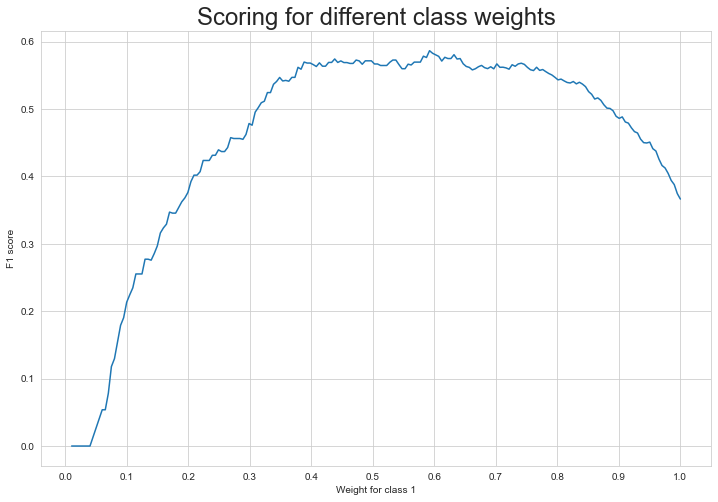

In [219]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
lr = LogisticRegression(max_iter=100, random_state = 42, C = 5, solver = 'liblinear', penalty='l2', fit_intercept=True, intercept_scaling = 0.3, multi_class = 'ovr')
svm = SVC(C = 3, kernel = 'poly', max_iter = -1, random_state = 42, probability=True , degree = 1 , gamma = 2, shrinking =True )
#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train_scaled, y_train)

#Ploting the score for different values of weight
sbn.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sbn.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

In [220]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


param_grid = [
    {
        'max_iter': [100,1000],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'C': [0.1, 0.5, 1, 2],
        #'penalty' : ['l1','l2', 'elasticnet'],
        'penalty' : ['none','l2','l1','elasticnet'],       
        #'fit_intercept' : ['True', 'False'],
        #'intercept_scaling' : [0.5, 1, 2, 5],
        #'multi_class' : ['auto', 'ovr', 'multinomial'],
        'random_state' : [42],
        #'class_weight': [{0:x, 1:1.0-x} for x in weights]
        
        
        
    }
]

lr_clf = LogisticRegression(n_jobs=12)
clf = GridSearchCV(lr_clf, param_grid, scoring='f1', verbose=True)
clf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


C:\Users\enesc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

C:\Users\enesc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1523: UserWarning: 'n_jobs' > 1 d

C:\Users\enesc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

C:\Users\enesc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. G

C:\Users\enesc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

GridSearchCV(estimator=LogisticRegression(n_jobs=12),
             param_grid=[{'C': [0.1, 0.5, 1, 2], 'max_iter': [100, 1000],
                          'penalty': ['none', 'l2', 'l1', 'elasticnet'],
                          'random_state': [42],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             scoring='f1', verbose=True)

In [221]:
y_pred = clf.predict(X_val_scaled)
y_prob_2d = clf.predict_proba(X_val_scaled)
y_prob = y_prob_2d[:, 1]

In [222]:
print('-' * 10)
print('res_clf')
res_clf = eval_clf(y_val, y_pred)
print(res_clf)

print('-' * 10)
print('res_auc')
res_auc = eval_auc(y_val, y_prob)
print(res_auc)

----------
res_clf
{'acc': 0.9013605442176871, 'p': 0.75, 'r': 0.574468085106383, 'f1': 0.6506024096385542}
----------
res_auc
{'roc_auc': 0.8961150831251615, 'pr_auc': 0.7338099725064426}


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = [
    {
        
        'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
        'kernel' : ['poly'],
        'C': [0.1, 1, 3, 5],           
        'max_iter': [-1 ,100],
        'degree' : [1],
        'gamma' : ['scale', 'auto'],
        'shrinking' : [True],
        'probability' : [True],       
        'class_weight': [{0:x, 1:1.0-x} for x in weights],
         'random_state' : [42],
        'coef0' : [0, 0.5, 1, 2],
        
        
    }
]

svm_clf = SVC()
clf = GridSearchCV(svm_clf, param_grid, scoring='f1', verbose=True)
clf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12800 candidates, totalling 64000 fits


C:\Users\enesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).

C:\Users\enesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).

C:\Users\enesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).

C:\Users\enesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).

C:\Users\enesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).

C:\Users\enesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).

C:\Users\enesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).

C:\Users\enesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\enesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).

In [ ]:
clf.best_params_

In [225]:
y_pred = clf.predict(X_val_scaled)
y_prob_2d = clf.predict_proba(X_val_scaled)
y_prob = y_prob_2d[:, 1]

In [226]:
print('-' * 10)
print('res_clf')
res_clf = eval_clf(y_val, y_pred)
print(res_clf)

print('-' * 10)
print('res_auc')
res_auc = eval_auc(y_val, y_prob)
print(res_auc)

----------
res_clf
{'acc': 0.8095238095238095, 'p': 0.423728813559322, 'r': 0.5319148936170213, 'f1': 0.4716981132075472}
----------
res_auc
{'roc_auc': 0.8203118270307521, 'pr_auc': 0.5180290912390456}


In [228]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
param_grid = [
    {
        'loss' : ['deviance', 'exponential'],
        'learning_rate' : [0.1, 0.5, 1, 2],         
        'n_estimators' : [100,300,500,1000],
        'max_depth' : [3,5,10],
        'max_features' : ['auto', 'sqrt', 'log2', None],
        
              
        
        'random_state' : [42],      
        
        
        
    }
]

gbm_clf = GradientBoostingClassifier()
clf = GridSearchCV(gbm_clf, param_grid, scoring='f1', verbose=True)
clf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid=[{'learning_rate': [0.1, 0.5, 1, 2],
                          'loss': ['deviance', 'exponential'],
                          'max_depth': [3, 5, 10], 'random_state': [42]}],
             scoring='f1', verbose=True)

In [229]:
clf.best_params_

{'learning_rate': 1, 'loss': 'exponential', 'max_depth': 3, 'random_state': 42}

In [230]:
y_pred = clf.predict(X_val_scaled)
y_prob_2d = clf.predict_proba(X_val_scaled)
y_prob = y_prob_2d[:, 1]

In [231]:
print('-' * 10)
print('res_clf')
res_clf = eval_clf(y_val, y_pred)
print(res_clf)

print('-' * 10)
print('res_auc')
res_auc = eval_auc(y_val, y_prob)
print(res_auc)

----------
res_clf
{'acc': 0.8571428571428571, 'p': 0.5581395348837209, 'r': 0.5106382978723404, 'f1': 0.5333333333333333}
----------
res_auc
{'roc_auc': 0.8488241881298992, 'pr_auc': 0.5679455090825742}


Template Hazırlanmasında Yardımcı Kaynak: https://www.kaggle.com/startupsci/titanic-data-science-solutions